In [92]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json

In [93]:
def sum_dict(dict1, dict2):
    res = {}
    for key in dict1:
        res[key] = {}
        for second_key in dict1[key]:
            res[key][second_key] = (
                dict1[key][second_key] + 
                dict2[key][second_key]
            )
    return res

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_combined_refusal_scatter_plot(refusal_df_vanilla, over_refusal_df_vanilla, 
                                         refusal_df_adv, over_refusal_df_adv):
    """
    Create a scatter plot with refusal scores vs (1 - over_refusal scores)
    for both vanilla and adversarial data on the same plot.
    
    Parameters:
    refusal_df_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    over_refusal_df_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    refusal_df_adv: DataFrame with languages as index, dataset compositions as columns (adversarial)
    over_refusal_df_adv: DataFrame with languages as index, dataset compositions as columns (adversarial)
    """
    
    # Find common languages and compositions across all dataframes
    common_languages = (refusal_df_vanilla.index
                       .intersection(over_refusal_df_vanilla.index)
                       .intersection(refusal_df_adv.index)
                       .intersection(over_refusal_df_adv.index))
    
    common_compositions = (refusal_df_vanilla.columns
                          .intersection(over_refusal_df_vanilla.columns)
                          .intersection(refusal_df_adv.columns)
                          .intersection(over_refusal_df_adv.columns))
    
    print(f"\nCommon languages ({len(common_languages)}): {list(common_languages)}")
    print(f"Common compositions ({len(common_compositions)}): {list(common_compositions)}")
    
    if len(common_languages) == 0:
        raise ValueError("No common languages found between the dataframes!")
    if len(common_compositions) == 0:
        raise ValueError("No common compositions found between the dataframes!")
    
    # Use only common languages and compositions
    languages = common_languages
    compositions = common_compositions
    
    # Create color map for languages (18 languages)
    colors1 = plt.cm.tab20(np.linspace(0, 1, 20))[:18]
    language_colors = dict(zip(languages, colors1))
    
    # Create marker map for dataset compositions (12 compositions)
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'd', 'X', '8']
    composition_markers = dict(zip(compositions, markers))
    
    # Create the plot with larger figure size
    plt.figure(figsize=(12, 8))
    
    # Plot vanilla data (black edge)
    for lang in languages:
        for comp in compositions:
            try:
                x = refusal_df_vanilla.loc[lang, comp]
                y = 100 - over_refusal_df_vanilla.loc[lang, comp]
                
                if pd.isna(x) or pd.isna(y):
                    continue
                
                plt.scatter(x, y, 
                           c=[language_colors[lang]], 
                           marker=composition_markers[comp],
                           s=60*len(comp.split("_"))**2,
                           alpha=0.8,
                           edgecolors='black',
                           linewidth=1.5,
                           label='_nolegend_')
            except KeyError:
                continue
    
    # Plot adversarial data (red edge)
    for lang in languages:
        for comp in compositions:
            try:
                x = refusal_df_adv.loc[lang, comp]
                y = 100 - over_refusal_df_adv.loc[lang, comp]
                
                if pd.isna(x) or pd.isna(y):
                    continue
                
                plt.scatter(x, y, 
                           c=[language_colors[lang]], 
                           marker=composition_markers[comp],
                           s=60*len(comp.split("_"))**2,
                           alpha=0.8,
                           edgecolors='red',
                           linewidth=1.5,
                           label='_nolegend_')
            except KeyError:
                continue
    
    # Create custom legends
    # Language legend (colors)
    lang_handles = []
    for lang in languages:
        lang_handles.append(plt.scatter([], [], c=[language_colors[lang]], 
                                      marker='o', s=40, alpha=0.8, 
                                      edgecolors='black', linewidth=0.3))
    
    # Composition legend (markers)
    comp_handles = []
    for comp in compositions:
        comp_handles.append(plt.scatter([], [], c='gray', 
                                      marker=composition_markers[comp], 
                                      s=40, alpha=0.8, 
                                      edgecolors='black', linewidth=0.3))
    
    # Data type legend (edge colors)
    type_handles = [
        plt.scatter([], [], c='gray', marker='o', s=40, alpha=0.8, 
                   edgecolors='black', linewidth=1.5),
        plt.scatter([], [], c='gray', marker='o', s=40, alpha=0.8, 
                   edgecolors='red', linewidth=1.5)
    ]
    
    # Add legends
    if len(languages) > 10:
        lang_legend = plt.legend(lang_handles, languages, 
                               title='Languages', loc='upper left', 
                               bbox_to_anchor=(1.02, 1), fontsize=9,
                               ncol=2, columnspacing=1)
    else:
        lang_legend = plt.legend(lang_handles, languages, 
                               title='Languages', loc='upper left', 
                               bbox_to_anchor=(1.02, 1), fontsize=9)
    
    plt.gca().add_artist(lang_legend)
    
    comp_legend = plt.legend(comp_handles, compositions, 
                           title='Dataset Compositions', loc='upper left', 
                           bbox_to_anchor=(1.02, 0.8), fontsize=9)
    
    plt.gca().add_artist(comp_legend)
    
    type_legend = plt.legend(type_handles, ['Vanilla', 'Adversarial'], 
                           title='Data Type', loc='upper left', 
                           bbox_to_anchor=(1.02, 0.4), fontsize=9)
    
    # Labels and title
    plt.xlabel('Refusal Score', fontsize=15)
    plt.ylabel('100 - Over Refusal Score', fontsize=15)
    plt.title('Refusal Score vs (100 - Over Refusal Score) by Language, Dataset Composition, and Data Type', 
              fontsize=14, pad=20)
    
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    
    # Grid for better readability
    plt.grid(True, alpha=0.3)
    
    
    # Adjust layout to accommodate legends
    plt.tight_layout()
    plt.subplots_adjust(right=0.7)
    
    plt.show()

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_combined_refusal_scatter_subplots(refusal_df_vanilla, over_refusal_df_vanilla, 
                                         refusal_df_adv, over_refusal_df_adv, model):

    """
    Create two scatter plots side by side: one for vanilla data and one for adversarial data.
    Both show refusal scores vs (1 - over_refusal scores).
    
    Parameters:
    refusal_df_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    over_refusal_df_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    refusal_df_adv: DataFrame with languages as index, dataset compositions as columns (adversarial)
    over_refusal_df_adv: DataFrame with languages as index, dataset compositions as columns (adversarial)
    """
    
    # Find common languages and compositions across all dataframes
    common_languages = (refusal_df_vanilla.index
                       .intersection(over_refusal_df_vanilla.index)
                       .intersection(refusal_df_adv.index)
                       .intersection(over_refusal_df_adv.index))
    
    common_compositions = (refusal_df_vanilla.columns
                          .intersection(over_refusal_df_vanilla.columns)
                          .intersection(refusal_df_adv.columns)
                          .intersection(over_refusal_df_adv.columns))
    
    print(f"\nCommon languages ({len(common_languages)}): {list(common_languages)}")
    print(f"Common compositions ({len(common_compositions)}): {list(common_compositions)}")
    
    if len(common_languages) == 0:
        raise ValueError("No common languages found between the dataframes!")
    if len(common_compositions) == 0:
        raise ValueError("No common compositions found between the dataframes!")
    
    # Use only common languages and compositions
    languages = common_languages
    compositions = common_compositions
    
    # Create color map for languages (18 languages)
    colors1 = plt.cm.tab20(np.linspace(0, 1, 20))[:18]
    language_colors = dict(zip(languages, colors1))
    
    # Create marker map for dataset compositions (13 compositions)
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'd', 'X', '8']
    composition_markers = dict(zip(compositions, markers))
    
    # Create the figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Plot vanilla data on the left subplot
    for lang in languages:
        for comp in compositions:
            try:
                x = refusal_df_vanilla.loc[lang, comp]
                y = 100 - over_refusal_df_vanilla.loc[lang, comp]
                
                if pd.isna(x) or pd.isna(y):
                    continue
                
                # Use red edge for composition "en", black for others
                edge_color = 'red' if comp == 'en' else 'black'
                
                ax1.scatter(x, y, 
                           c=[language_colors[lang]], 
                           marker=composition_markers[comp],
                           s=60*len(comp.split("_"))**2,
                           alpha=0.8,
                           edgecolors=edge_color,
                           linewidth=1.5,
                           label='_nolegend_')
            except KeyError:
                continue
    
    # Plot adversarial data on the right subplot
    for lang in languages:
        for comp in compositions:
            try:
                x = refusal_df_adv.loc[lang, comp]
                y = 100 - over_refusal_df_adv.loc[lang, comp]
                
                if pd.isna(x) or pd.isna(y):
                    continue
                
                # Use red edge for composition "en", black for others
                edge_color = 'red' if comp == 'en' else 'black'
                
                ax2.scatter(x, y, 
                           c=[language_colors[lang]], 
                           marker=composition_markers[comp],
                           s=60*len(comp.split("_"))**2,
                           alpha=0.8,
                           edgecolors=edge_color,
                           linewidth=1.5,
                           label='_nolegend_')
            except KeyError:
                continue
    
    # Configure both subplots
    for ax, title in zip([ax1, ax2], ['Vanilla Data', 'Adversarial Data']):
        ax.set_xlabel('Refusal Score', fontsize=15)
        ax.set_ylabel('100 - Over Refusal Score', fontsize=15)
        ax.set_title(title, fontsize=15, pad=10)
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        ax.grid(True, alpha=0.3)
    
    # Create custom legends
    # Language legend (colors)
    lang_handles = []
    for lang in languages:
        lang_handles.append(plt.scatter([], [], c=[language_colors[lang]], 
                                      marker='o', s=40, alpha=0.8, 
                                      edgecolors='black', linewidth=0.3))
    
    # Composition legend (markers)
    comp_handles = []
    for comp in compositions:
        # Use red edge for "en" composition, black for others
        edge_color = 'red' if comp == 'en' else 'black'
        comp_handles.append(plt.scatter([], [], c='gray', 
                                      marker=composition_markers[comp], 
                                      s=40, alpha=0.8, 
                                      edgecolors=edge_color, linewidth=1.5))
    
    # Add legends to the right side of the figure
    if len(languages) > 10:
        lang_legend = fig.legend(lang_handles, languages, 
                               title='Languages', loc='upper left', 
                               bbox_to_anchor=(0.92, 0.95), fontsize=9,
                               ncol=2, columnspacing=1)
    else:
        lang_legend = fig.legend(lang_handles, languages, 
                               title='Languages', loc='upper left', 
                               bbox_to_anchor=(0.92, 0.95), fontsize=9)
    
    comp_legend = fig.legend(comp_handles, compositions, 
                           title='Dataset Compositions', loc='upper left', 
                           bbox_to_anchor=(0.92, 0.5), fontsize=9)
    
    # Main title
    fig.suptitle(f'Refusal Score vs (100 - Over Refusal Score) by Language and Dataset Composition - {model}', 
                fontsize=16, y=0.98)
    
    # Adjust layout to accommodate legends
    plt.tight_layout()
    plt.subplots_adjust(right=0.88)
    
    plt.show()

In [96]:
def create_refusal_barplot_cat(refusal_df_vanilla, over_refusal_df_vanilla, 
                           refusal_df_adv, over_refusal_df_adv, model,  lg_list):
    """
    Create two bar plots side by side: one for vanilla data and one for adversarial data.
    For each category, show refusal and over-refusal scores for each composition (High/Medium/Low).
    
    Parameters:
    refusal_df_vanilla: DataFrame with compositions as index, categories as columns (vanilla)
    over_refusal_df_vanilla: DataFrame with compositions as index, categories as columns (vanilla)
    refusal_df_adv: DataFrame with compositions as index, categories as columns (adversarial)
    over_refusal_df_adv: DataFrame with compositions as index, categories as columns (adversarial)
    lg_list: List of categories in desired order
    """
    
    # Find common compositions across all dataframes
    common_compositions = (refusal_df_vanilla.index
                          .intersection(over_refusal_df_vanilla.index)
                          .intersection(refusal_df_adv.index)
                          .intersection(over_refusal_df_adv.index))
    
    print(f"\nCommon compositions ({len(common_compositions)}): {list(common_compositions)}")
    
    if len(common_compositions) == 0:
        raise ValueError("No common compositions found between the dataframes!")
    
    # Order compositions: High, Medium, Low
    comp_order = ['High', 'Medium', 'Low']
    compositions = [comp for comp in comp_order if comp in common_compositions]
    n_compositions = len(compositions)
    
    print(f"Using {n_compositions} compositions: {compositions}")
    
    # Get categories (columns) - order by lg_list if provided
    all_categories = list(refusal_df_vanilla.columns)
    if lg_list:
        categories = [cat for cat in lg_list if cat in all_categories]
        # Add any remaining categories not in lg_list
        categories.extend([cat for cat in all_categories if cat not in categories])
    else:
        categories = all_categories
    
    n_categories = len(categories)
    print(f"Found {n_categories} categories: {categories}")
    
    # Create the figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Set up bar positions
    x = np.arange(len(categories))
    # For each composition, we have 2 bars (refusal and over-refusal) side by side
    n_bars_per_comp = 2
    total_bars = n_compositions * n_bars_per_comp
    width = 0.8 / total_bars  # Total width of 0.8 divided by number of bars
    
    # Colors for compositions
    comp_colors_refusal = ['#2d7f2e', '#5cb85c', '#90ee90']
    comp_colors_overrefusal = ['#8b0000', '#dc143c', '#ff6b6b']
    
    # Plot vanilla data on the left subplot
    for i, comp in enumerate(compositions):
        # Calculate base offset for this composition (each comp gets 2 bars)
        base_offset = (i * n_bars_per_comp - n_compositions) * width
        
        # Refusal bars
        refusal_values = [refusal_df_vanilla.loc[comp, cat] for cat in categories]
        ax1.bar(x + base_offset, refusal_values, width, 
                label=f'{comp} - Refusal', color=comp_colors_refusal[i], alpha=0.9, 
                edgecolor='black', linewidth=0.5)
        
        # Over-refusal bars (right next to refusal)
        over_refusal_values = [over_refusal_df_vanilla.loc[comp, cat] for cat in categories]
        ax1.bar(x + base_offset + width, over_refusal_values, width, 
                label=f'{comp} - Over-Refusal', color=comp_colors_overrefusal[i], alpha=0.5, 
                edgecolor='black', linewidth=0.5)
    
    # Plot adversarial data on the right subplot
    for i, comp in enumerate(compositions):
        # Calculate base offset for this composition (each comp gets 2 bars)
        base_offset = (i * n_bars_per_comp - n_compositions) * width
        
        # Refusal bars
        refusal_values = [refusal_df_adv.loc[comp, cat] for cat in categories]
        ax2.bar(x + base_offset, refusal_values, width, 
                label=f'{comp} - Refusal', color=comp_colors_refusal[i], alpha=0.9, 
                edgecolor='black', linewidth=0.5)
        
        # Over-refusal bars (right next to refusal)
        over_refusal_values = [over_refusal_df_adv.loc[comp, cat] for cat in categories]
        ax2.bar(x + base_offset + width, over_refusal_values, width, 
                label=f'{comp} - Over-Refusal', color=comp_colors_overrefusal[i], alpha=0.5, 
                edgecolor='black', linewidth=0.5)
    
    # Configure both subplots
    for ax, title in zip([ax1, ax2], ['Vanilla Data', 'Adversarial Data']):
        ax.set_xlabel('Category', fontsize=15)
        ax.set_ylabel('Score', fontsize=15)
        ax.set_title(title, fontsize=17, pad=10)
        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=15)
        ax.set_ylim(0, 100)
        ax.legend(fontsize=13, ncol=2)
        ax.grid(True, alpha=0.3, axis='y')
    
    # Main title
    #fig.suptitle(f'Refusal and Over-Refusal Scores - {model}', 
    #            fontsize=16, y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    
    plt.show()

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def harmonic_mean(refusal_score, over_refusal_score):
    return (2*refusal_score*(100-over_refusal_score))/(refusal_score+(100-over_refusal_score))

def create_refusal_barplot(refusal_df_vanilla, over_refusal_df_vanilla,
                           refusal_df_adv, over_refusal_df_adv, model, lg_list):
    """
    Create two bar plots side by side: one for vanilla data and one for adversarial data.
    For each dataset composition, show mean refusal and mean over-refusal scores.
    
    Parameters:
    refusal_df_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    over_refusal_df_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    refusal_df_adv: DataFrame with languages as index, dataset compositions as columns (adversarial)
    over_refusal_df_adv: DataFrame with languages as index, dataset compositions as columns (adversarial)
    lg_list: List of dataset compositions in desired order
    """
    # Find common compositions across all dataframes
    common_compositions = (refusal_df_vanilla.columns
                          .intersection(over_refusal_df_vanilla.columns)
                          .intersection(refusal_df_adv.columns)
                          .intersection(over_refusal_df_adv.columns))
    
    print(f"\nCommon compositions ({len(common_compositions)}): {list(common_compositions)}")
    
    if len(common_compositions) == 0:
        raise ValueError("No common compositions found between the dataframes!")
    
    # Order compositions according to lg_list, keeping only common ones
    compositions = [comp for comp in lg_list if comp in common_compositions]
    print(f"Using {len(compositions)} compositions in lg_list order: {compositions}")
    
    # Calculate mean scores for each composition
    # Vanilla data
    mean_refusal_vanilla = refusal_df_vanilla[compositions].mean(axis=0)
    mean_over_refusal_vanilla = over_refusal_df_vanilla[compositions].mean(axis=0)
    
    # Adversarial data
    mean_refusal_adv = refusal_df_adv[compositions].mean(axis=0)
    mean_over_refusal_adv = over_refusal_df_adv[compositions].mean(axis=0)
    
    # Calculate harmonic means for each composition
    harmonic_vanilla = [harmonic_mean(mean_refusal_vanilla[comp], mean_over_refusal_vanilla[comp]) 
                        for comp in compositions]
    harmonic_adv = [harmonic_mean(mean_refusal_adv[comp], mean_over_refusal_adv[comp]) 
                    for comp in compositions]
    
    # Create the figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
    
    # Set up bar positions
    x = np.arange(len(compositions))
    width = 0.35  # Width of bars
    
    # Plot vanilla data on the left subplot
    bars1_vanilla = ax1.bar(x - width/2, mean_refusal_vanilla, width,
                            label='Mean Refusal Score', color='forestgreen', alpha=0.8)
    bars2_vanilla = ax1.bar(x + width/2, mean_over_refusal_vanilla, width,
                            label='Mean Over-Refusal Score', color='tomato', alpha=0.8)
    
    # Add harmonic mean stars for vanilla
    ax1.scatter(x, harmonic_vanilla, color='black', s=200, marker='*', 
                zorder=5, label='Harmonic Mean', edgecolors='white', linewidth=1)
    
    # Plot adversarial data on the right subplot
    bars1_adv = ax2.bar(x - width/2, mean_refusal_adv, width,
                        label='Mean Refusal Score', color='forestgreen', alpha=0.8)
    bars2_adv = ax2.bar(x + width/2, mean_over_refusal_adv, width,
                        label='Mean Over-Refusal Score', color='tomato', alpha=0.8)
    
    # Add harmonic mean stars for adversarial
    ax2.scatter(x, harmonic_adv, color='black', s=200, marker='*', 
                zorder=5, label='Harmonic Mean', edgecolors='white', linewidth=1)
    
    # Configure both subplots
    for ax, title in zip([ax1, ax2], ['Vanilla Data', 'Adversarial Data']):
        ax.set_xlabel('Dataset Composition', fontsize=17)
        ax.set_ylabel('Mean Score', fontsize=17)
        ax.set_title(title, fontsize=17, pad=10)
        ax.set_xticks(x)
        ax.set_xticklabels(compositions, rotation=45, ha='right', fontsize=20)
        ax.set_ylim(0, 100)
        ax.grid(True, alpha=0.3, axis='y')
    ax1.legend(fontsize=15)
    
    # Main title
    # fig.suptitle(f'Mean Refusal and Over-Refusal Scores - {model}',
    #              fontsize=16, y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_refusal_barplot_en(refusal_df_vanilla, over_refusal_df_vanilla, 
                           refusal_df_adv, over_refusal_df_adv, model, lg_list):

    """
    Create two bar plots side by side: one for vanilla data and one for adversarial data.
    For each dataset composition, show mean refusal and mean over-refusal scores.
    
    Parameters:
    refusal_df_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    over_refusal_df_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    refusal_df_adv: DataFrame with languages as index, dataset compositions as columns (adversarial)
    over_refusal_df_adv: DataFrame with languages as index, dataset compositions as columns (adversarial)
    lg_list: List of dataset compositions in desired order
    """
    
    # Find common compositions across all dataframes
    lg_eval = (refusal_df_vanilla.index
                          .intersection(over_refusal_df_vanilla.index)
                          .intersection(refusal_df_adv.index)
                          .intersection(over_refusal_df_adv.index))

    # Calculate mean scores for each composition
    # Vanilla data
    mean_refusal_vanilla = refusal_df_vanilla["en"]
    mean_over_refusal_vanilla = over_refusal_df_vanilla["en"]
    
    # Adversarial data
    mean_refusal_adv = refusal_df_adv["en"]
    mean_over_refusal_adv = over_refusal_df_adv["en"]
    
    # Create the figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Set up bar positions
    x = np.arange(len(lg_eval))
    width = 0.35  # Width of bars
    
    # Plot vanilla data on the left subplot
    bars1_vanilla = ax1.bar(x - width/2, mean_refusal_vanilla, width, 
                            label='Refusal Score', color='forestgreen', alpha=0.8)
    bars2_vanilla = ax1.bar(x + width/2, mean_over_refusal_vanilla, width, 
                            label='Over-Refusal Score', color='tomato', alpha=0.8)
    
    # Plot adversarial data on the right subplot
    bars1_adv = ax2.bar(x - width/2, mean_refusal_adv, width, 
                        label='Refusal Score', color='forestgreen', alpha=0.8)
    bars2_adv = ax2.bar(x + width/2, mean_over_refusal_adv, width, 
                        label='Over-Refusal Score', color='tomato', alpha=0.8)
    
    # Configure both subplots
    for ax, title in zip([ax1, ax2], ['Vanilla Data', 'Adversarial Data']):
        ax.set_xlabel('Evaluation languages', fontsize=17)
        ax.set_ylabel('Mean Score', fontsize=17)
        ax.set_title(title, fontsize=17, pad=10)
        ax.set_xticks(x)
        ax.set_xticklabels(lg_eval, rotation=45, ha='right', fontsize=15)
        ax.set_ylim(0, 100)
        ax.grid(True, alpha=0.3, axis='y')
    ax1.legend(fontsize=13)
    
    # Main title
    #fig.suptitle(f'Mean Refusal and Over-Refusal Scores - {model}', 
    #            fontsize=16, y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    
    plt.show()

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def harmonic_mean(refusal_score, over_refusal_score):
    return (2*refusal_score*(100-over_refusal_score))/(refusal_score+(100-over_refusal_score))

def compute_df_harmonic(df_refusal, df_over_refusal):
    # Ensure the dataframes have the same shape
    if df_refusal.shape != df_over_refusal.shape:
        raise ValueError("DataFrames must have the same shape.")
    # Compute the harmonic mean for each element
    df_harmonic = df_refusal.combine(df_over_refusal, func=lambda ref, over_ref: harmonic_mean(ref, over_ref))
    return df_harmonic

def create_harmonic_mean_barplot(df_ref_vanilla, df_over_vanilla, 
                                 df_ref_adversarial, df_over_adversarial, model, lg_list):

    """
    Create a bar plot showing harmonic mean scores for vanilla and adversarial data.
    Groups languages by resource level (High/Medium/Low) and shows bars for each category.
    Also plots overall average across all 18 languages.
    
    Parameters:
    df_ref_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    df_over_vanilla: DataFrame with languages as index, dataset compositions as columns (vanilla)
    df_ref_adversarial: DataFrame with languages as index, dataset compositions as columns (adversarial)
    df_over_adversarial: DataFrame with languages as index, dataset compositions as columns (adversarial)
    lg_list: List of categories in desired order
    """
    
    # Define language groups
    high_lg = ['en','fr','pt', 'de', 'es','ja', 'ar', 'zh']
    middle_lg = ['bn', 'el', 'da']
    low_lg = ['jv', 'sw', 'mk' , 'lo', 'tt', 'pag', 'mt']
    
    # Group languages by category for vanilla refusal
    df_high = df_ref_vanilla[df_ref_vanilla.index.isin(high_lg)]
    df_medium = df_ref_vanilla[df_ref_vanilla.index.isin(middle_lg)]
    df_low = df_ref_vanilla[df_ref_vanilla.index.isin(low_lg)]
    df_cat_ref_vanilla = pd.concat([df_high.mean(), df_medium.mean(), df_low.mean()], 
                                    keys=["High", "Medium", "Low"], axis=1)
    
    # Group languages by category for adversarial refusal
    df_high = df_ref_adversarial[df_ref_adversarial.index.isin(high_lg)]
    df_medium = df_ref_adversarial[df_ref_adversarial.index.isin(middle_lg)]
    df_low = df_ref_adversarial[df_ref_adversarial.index.isin(low_lg)]
    df_cat_ref_adversarial = pd.concat([df_high.mean(), df_medium.mean(), df_low.mean()], 
                                        keys=["High", "Medium", "Low"], axis=1)
    
    # Group languages by category for vanilla over-refusal
    df_high = df_over_vanilla[df_over_vanilla.index.isin(high_lg)]
    df_medium = df_over_vanilla[df_over_vanilla.index.isin(middle_lg)]
    df_low = df_over_vanilla[df_over_vanilla.index.isin(low_lg)]
    df_cat_over_vanilla = pd.concat([df_high.mean(), df_medium.mean(), df_low.mean()], 
                                     keys=["High", "Medium", "Low"], axis=1)
    
    # Group languages by category for adversarial over-refusal
    df_high = df_over_adversarial[df_over_adversarial.index.isin(high_lg)]
    df_medium = df_over_adversarial[df_over_adversarial.index.isin(middle_lg)]
    df_low = df_over_adversarial[df_over_adversarial.index.isin(low_lg)]
    df_cat_over_adversarial = pd.concat([df_high.mean(), df_medium.mean(), df_low.mean()], 
                                         keys=["High", "Medium", "Low"], axis=1)
    
    # Compute harmonic means by category
    harmonic_vanilla = compute_df_harmonic(df_cat_ref_vanilla.T, df_cat_over_vanilla.T)
    harmonic_adv = compute_df_harmonic(df_cat_ref_adversarial.T, df_cat_over_adversarial.T)
    
    # Compute overall harmonic mean across all 18 languages (not by category)
    harmonic_all_vanilla = compute_df_harmonic(df_ref_vanilla, df_over_vanilla)
    harmonic_all_adv = compute_df_harmonic(df_ref_adversarial, df_over_adversarial)
    overall_vanilla = harmonic_all_vanilla.mean(axis=0)  # Mean across all languages
    overall_adv = harmonic_all_adv.mean(axis=0)  # Mean across all languages
    
    print("\nHarmonic mean vanilla by category:")
    print(harmonic_vanilla)
    print("\nHarmonic mean adversarial by category:")
    print(harmonic_adv)
    print("\nOverall harmonic mean vanilla (across all 18 languages):")
    print(overall_vanilla)
    print("\nOverall harmonic mean adversarial (across all 18 languages):")
    print(overall_adv)
    
    # Get compositions (High, Medium, Low)
    compositions = ['High', 'Medium', 'Low']
    n_compositions = len(compositions)
    
    # Get categories - order by lg_list if provided
    all_categories = list(harmonic_vanilla.columns)
    if lg_list:
        categories = [cat for cat in lg_list if cat in all_categories]
        # Add any remaining categories not in lg_list
        categories.extend([cat for cat in all_categories if cat not in categories])
    else:
        categories = all_categories
    
    n_categories = len(categories)
    print(f"\nFound {n_categories} categories: {categories}")
    
    # Create the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    
    # Set up bar positions
    x = np.arange(len(categories))
    width = 0.8 / n_compositions  # Width for each composition bar
    
    # Colors for compositions
    comp_colors = plt.cm.Set1(np.linspace(0, 1, n_compositions))
    
    # Plot vanilla data on the left subplot
    for i, comp in enumerate(compositions):
        offset = (i - n_compositions/2 + 0.5) * width
        values = [harmonic_vanilla.loc[comp, cat] for cat in categories]
        ax1.bar(x + offset, values, width, 
                label=f'{comp}', color=comp_colors[i], alpha=0.9, 
                edgecolor='black', linewidth=0.5)
    
    # Add overall average points for vanilla
    for cat in categories:
        ax1.scatter([categories.index(cat)], [overall_vanilla[cat]], 
                   color='black', s=100, marker='*', zorder=5, 
                   label='Overall Average' if cat == categories[0] else '')
    
    # Plot adversarial data on the right subplot
    for i, comp in enumerate(compositions):
        offset = (i - n_compositions/2 + 0.5) * width
        values = [harmonic_adv.loc[comp, cat] for cat in categories]
        ax2.bar(x + offset, values, width, 
                label=f'{comp}', color=comp_colors[i], alpha=0.9, 
                edgecolor='black', linewidth=0.5)
    
    # Add overall average points for adversarial
    for cat in categories:
        ax2.scatter([categories.index(cat)], [overall_adv[cat]], 
                   color='black', s=100, marker='*', zorder=5,
                   label='Overall Average' if cat == categories[0] else '')
    
    # Configure both subplots
    for ax, title in zip([ax1, ax2], ['Vanilla Data', 'Adversarial Data']):
        ax.set_xlabel('Dataset Composition', fontsize=16)
        ax.set_ylabel('Harmonic Mean Score', fontsize=16)
        ax.set_title(title, fontsize=17, pad=10)
        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=15)
        ax.set_ylim(0, 100)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3, axis='y')
    
    # Main title
    #fig.suptitle(f'Harmonic Mean Scores - {model}', 
    #            fontsize=16, y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    
    plt.show()


Common languages (3): ['High', 'Medium', 'Low']
Common compositions (13): ['en', 'fr', 'pt', 'zh', 'ar', 'lo', 'tt', 'mt', 'pag', 'fr_pt', 'zh_ar', 'pag_mt', 'lo_tt']


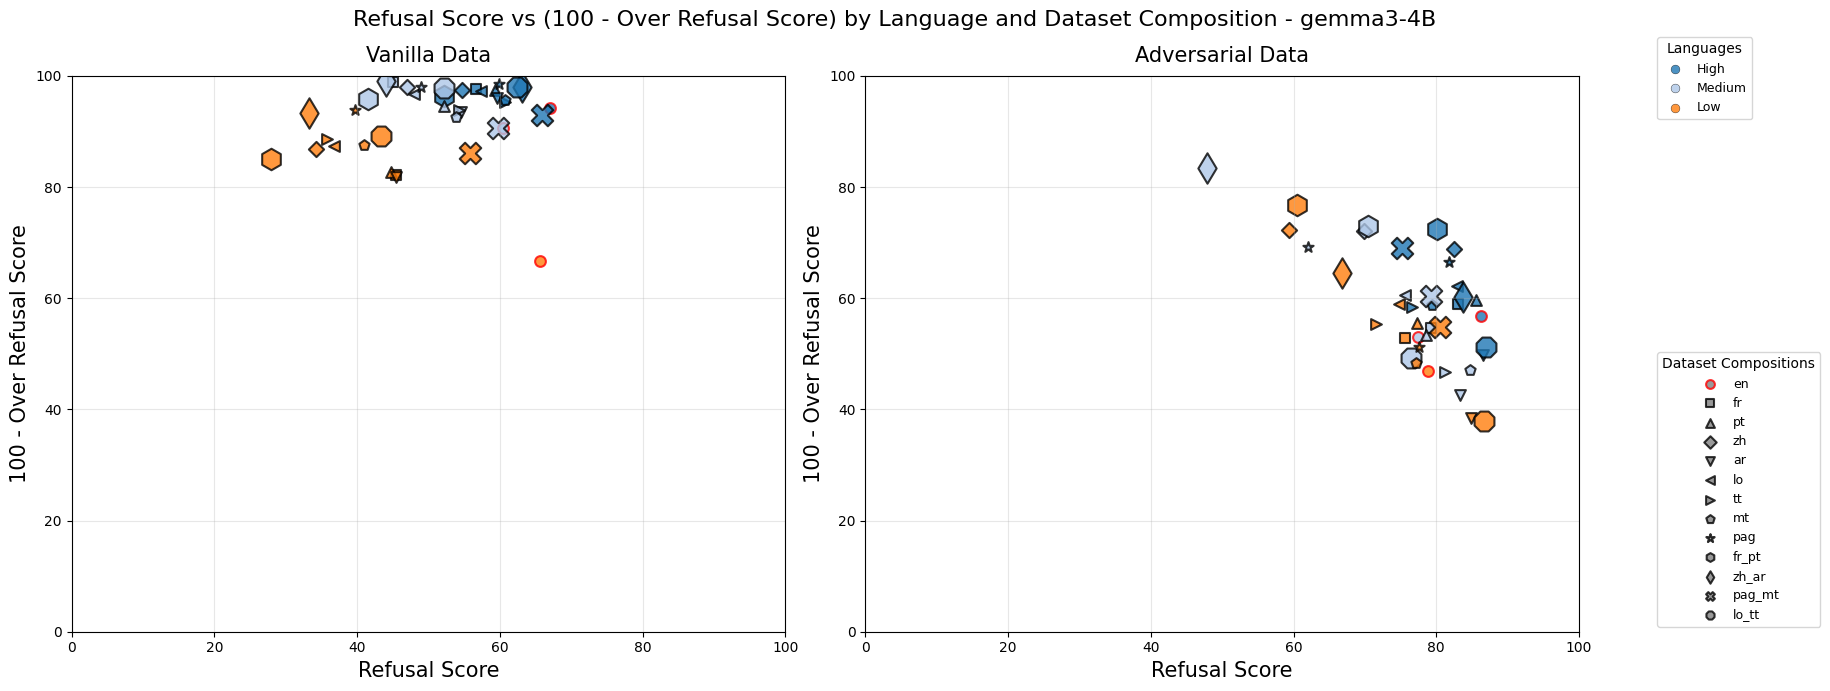

In [107]:
lg_list = [ "en", "fr", "pt", "zh", "ar", "lo", "tt", "mt", "pag", "fr_pt", "zh_ar", "pag_mt", "lo_tt"]
path = "../../data_results/padding_left/gemma3-4B"

model_base = "gemma3-4B"

data_over_refusal = {}
data_refusal = {}

for lg in lg_list :
    epoch = 2.00
    if lg=="without_WJ": 
        model = "baseline_en"
        checkpoint=3800
    else:
        model = lg
        checkpoint=3988
    path_ref_json = f"{path}/{model}/result_refusal_vanilla_{checkpoint}_left_padding.json"
    path_ove_json = f"{path}/{model}/result_over_refusal_vanilla_{checkpoint}_left_padding.json"
    path_inc_json = f"{path}/{model}/result_incertain_harmful_vanilla_{checkpoint}_left_padding.json"
    with open(path_ref_json) as json_file:
        data_ref = json.load(json_file)
    with open(path_ove_json) as json_file:
        data_over = json.load(json_file)
    with open(path_inc_json) as json_file:
        data_inc = json.load(json_file)


    data_r = sum_dict(data_ref, data_inc)
    data_refusal[lg] = data_r
    data_over_refusal[lg] = data_over
    

lg_eval=list(data_refusal["en"].keys())

ref_all = []
over_all=[]
for lg_train in lg_list :
    satis_model = []
    ref_model = []
    over_model=[]
    for lg_ev in lg_eval : 
        ref = np.sum(list(data_refusal[lg_train][lg_ev].values()))
        over = np.sum(list(data_over_refusal[lg_train][lg_ev].values()))
        ref_model.append(ref)
        over_model.append(over)
    ref_all.append(pd.Series(ref_model, index=lg_eval))
    over_all.append(pd.Series(over_model, index=lg_eval))

df_ref_vanilla = pd.concat(ref_all, axis=1, keys=lg_list)
df_over_vanilla = pd.concat(over_all, axis=1, keys=lg_list)

data_over_refusal = {}
data_refusal = {}

for lg in lg_list :
    epoch = 2.00
    if lg=="without_WJ": 
        model = "baseline_en"
        checkpoint=3800
    else:
        model = lg
        checkpoint=3988
    path_ref_json = f"{path}/{model}/result_refusal_adversarial_{checkpoint}_left_padding.json"
    path_ove_json = f"{path}/{model}/result_over_refusal_adversarial_{checkpoint}_left_padding.json"
    path_inc_json = f"{path}/{model}/result_incertain_harmful_adversarial_{checkpoint}_left_padding.json"
    with open(path_ref_json) as json_file:
        data_ref = json.load(json_file)
    with open(path_ove_json) as json_file:
        data_over = json.load(json_file)
    with open(path_inc_json) as json_file:
        data_inc = json.load(json_file)


    data_r = sum_dict(data_ref, data_inc)
    data_refusal[lg] = data_r
    data_over_refusal[lg] = data_over
    

lg_eval=list(data_refusal["en"].keys())

ref_all = []
over_all=[]
for lg_train in lg_list :
    satis_model = []
    ref_model = []
    over_model=[]
    for lg_ev in lg_eval : 
        ref = np.sum(list(data_refusal[lg_train][lg_ev].values()))
        over = np.sum(list(data_over_refusal[lg_train][lg_ev].values()))
        ref_model.append(ref)
        over_model.append(over)
    ref_all.append(pd.Series(ref_model, index=lg_eval))
    over_all.append(pd.Series(over_model, index=lg_eval))

df_ref_adversarial = pd.concat(ref_all, axis=1, keys=lg_list)
df_over_adversarial = pd.concat(over_all, axis=1, keys=lg_list)

high_lg = ['en','fr','pt', 'de', 'es','ja', 'ar', 'zh']
middle_lg = ['bn', 'el', 'da']
low_lg = ['jv', 'sw', 'mk' , 'lo', 'tt', 'pag', 'mt']


df_high=df_ref_vanilla[df_ref_vanilla.index.isin(high_lg)]
df_medium=df_ref_vanilla[df_ref_vanilla.index.isin(middle_lg)]
df_low=df_ref_vanilla[df_ref_vanilla.index.isin(low_lg)]
df_cat_ref_vanilla=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

df_high=df_ref_adversarial[df_ref_adversarial.index.isin(high_lg)]
df_medium=df_ref_adversarial[df_ref_adversarial.index.isin(middle_lg)]
df_low=df_ref_adversarial[df_ref_adversarial.index.isin(low_lg)]
df_cat_ref_adversarial=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

df_high=df_over_vanilla[df_over_vanilla.index.isin(high_lg)]
df_medium=df_over_vanilla[df_over_vanilla.index.isin(middle_lg)]
df_low=df_over_vanilla[df_over_vanilla.index.isin(low_lg)]
df_cat_over_vanilla=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

df_high=df_over_adversarial[df_over_adversarial.index.isin(high_lg)]
df_medium=df_over_adversarial[df_over_adversarial.index.isin(middle_lg)]
df_low=df_over_adversarial[df_over_adversarial.index.isin(low_lg)]
df_cat_over_adversarial=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

create_combined_refusal_scatter_subplots(df_cat_ref_vanilla.transpose(), df_cat_over_vanilla.transpose(), 
                                         df_cat_ref_adversarial.transpose(), df_cat_over_adversarial.transpose(), model_base)

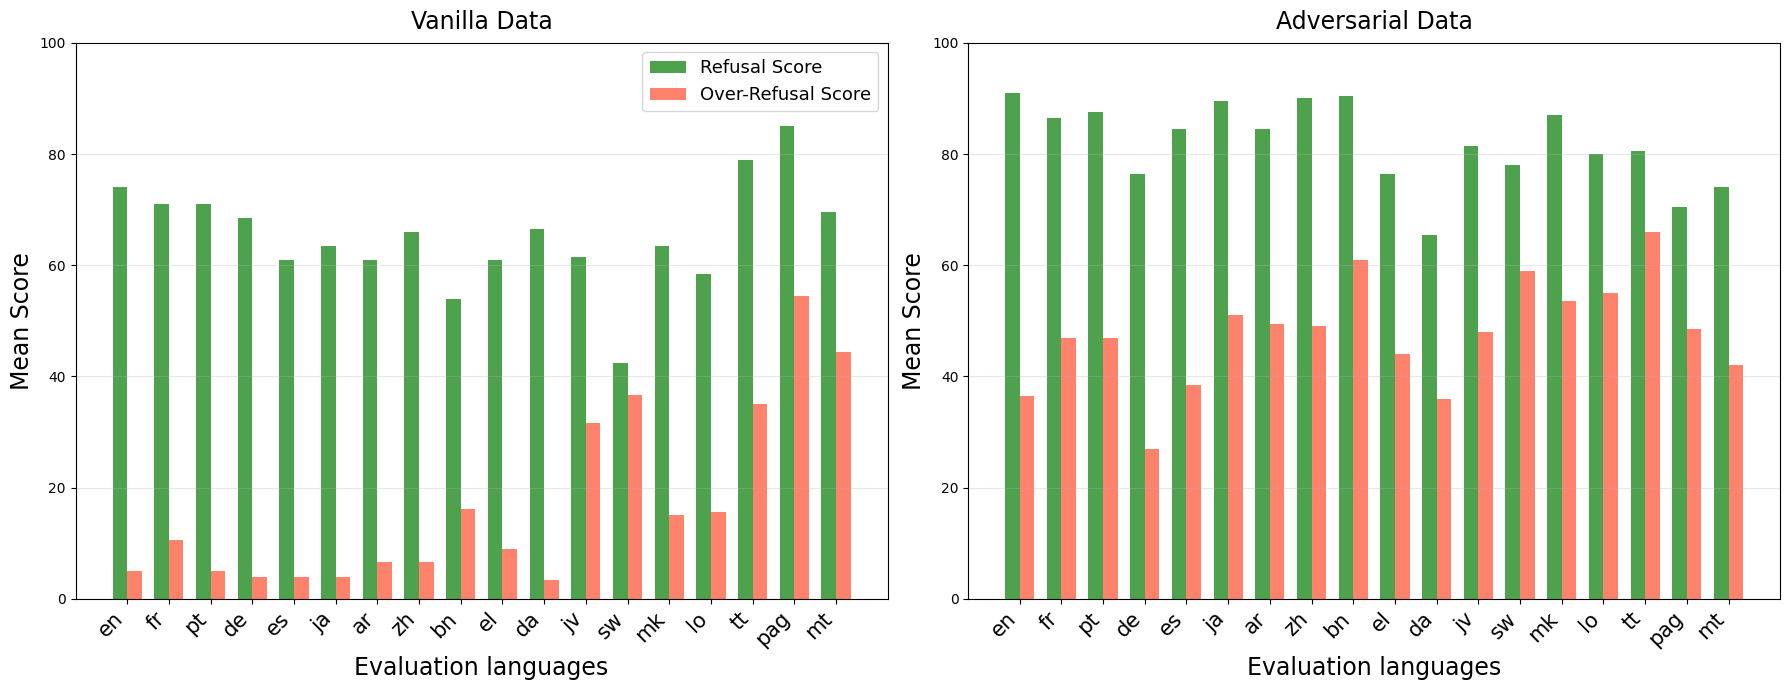

In [108]:
create_refusal_barplot_en(df_ref_vanilla, df_over_vanilla, 
                           df_ref_adversarial, df_over_adversarial, model_base, lg_list)


Common compositions (13): ['en', 'fr', 'pt', 'zh', 'ar', 'lo', 'tt', 'mt', 'pag', 'fr_pt', 'zh_ar', 'pag_mt', 'lo_tt']
Using 13 compositions in lg_list order: ['en', 'fr', 'pt', 'zh', 'ar', 'lo', 'tt', 'mt', 'pag', 'fr_pt', 'zh_ar', 'pag_mt', 'lo_tt']


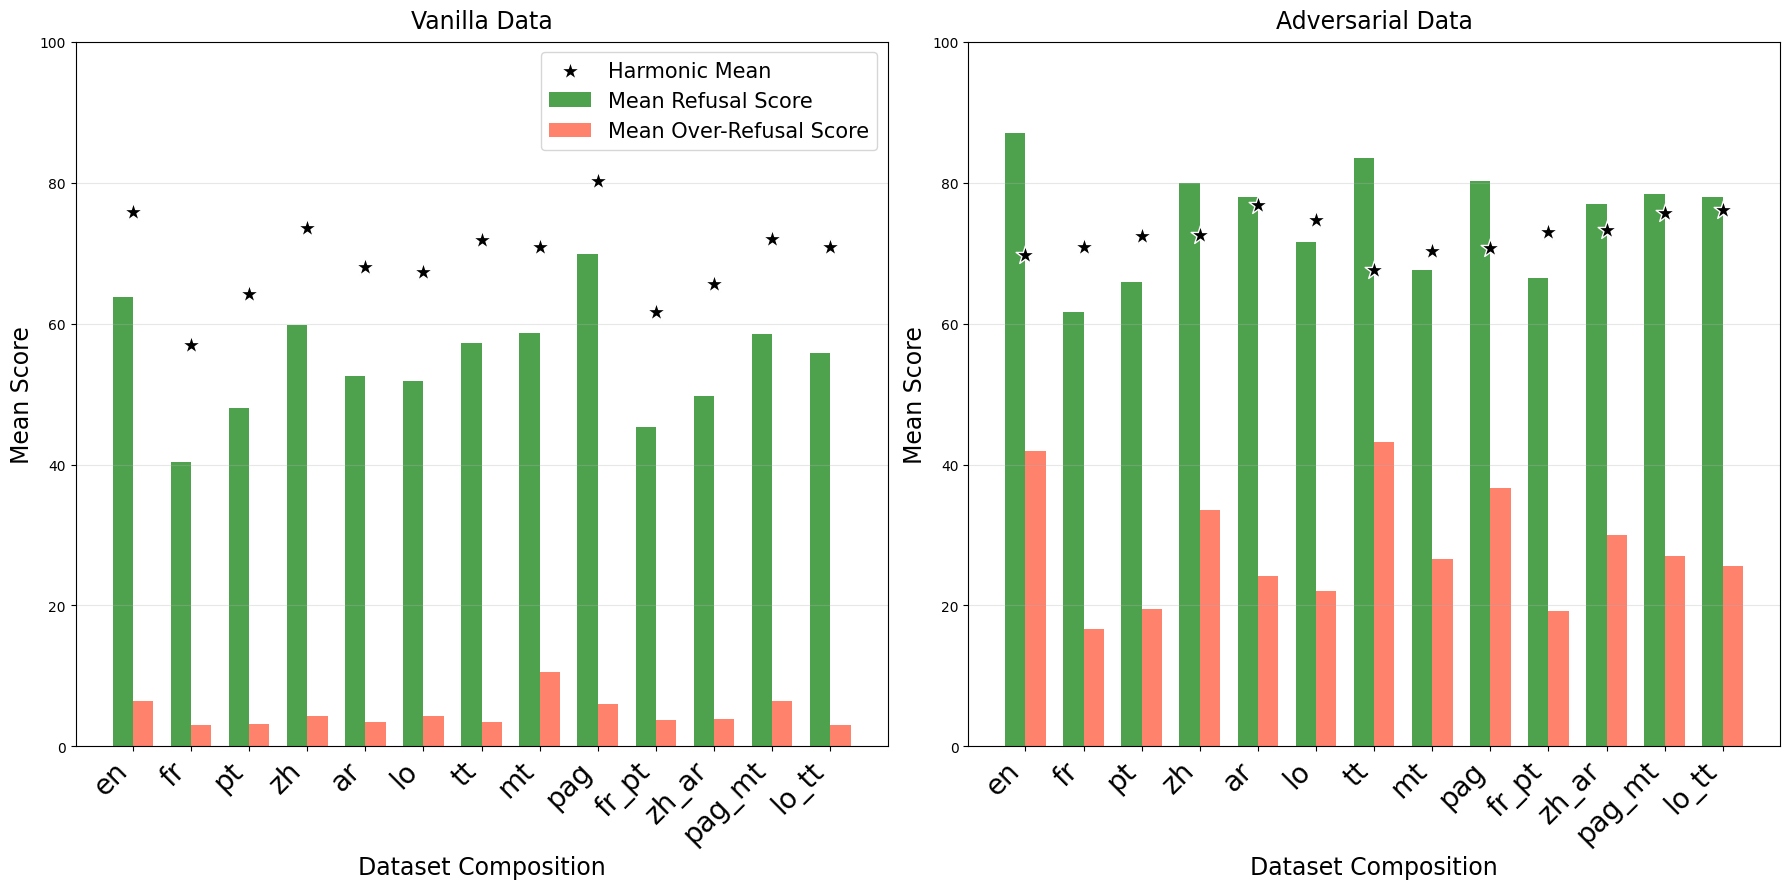

In [ ]:
create_refusal_barplot(df_ref_vanilla, df_over_vanilla, 
                           df_ref_adversarial, df_over_adversarial, model_base, lg_list)


Harmonic mean vanilla by category:
               en         fr         pt         zh         ar         lo  \
High    86.016442  74.681037  82.757571  85.484107  83.388278  80.317492   
Medium  78.115232  57.297153  64.049805  72.444869  62.627241  64.859524   
Low     59.943387  29.472626  34.331590  57.137503  48.603774  49.876820   

               tt         mt        pag      fr_pt      zh_ar     pag_mt  \
High    85.680992  79.623342  84.460117  79.159970  82.366890  80.886874   
Medium  69.804161  60.445946  77.015638  63.486644  62.635956  59.452273   
Low     52.849636  64.591200  76.500733  33.535625  41.428195  66.136877   

            lo_tt  
High    82.278632  
Medium  63.525046  
Low     58.780222  

Harmonic mean adversarial by category:
               en         fr         pt         zh         ar         lo  \
High    80.758158  79.167077  80.234229  79.772727  82.962008  81.474224   
Medium  70.702160  69.641263  73.300076  73.493953  79.491265  74.395254   
Low   

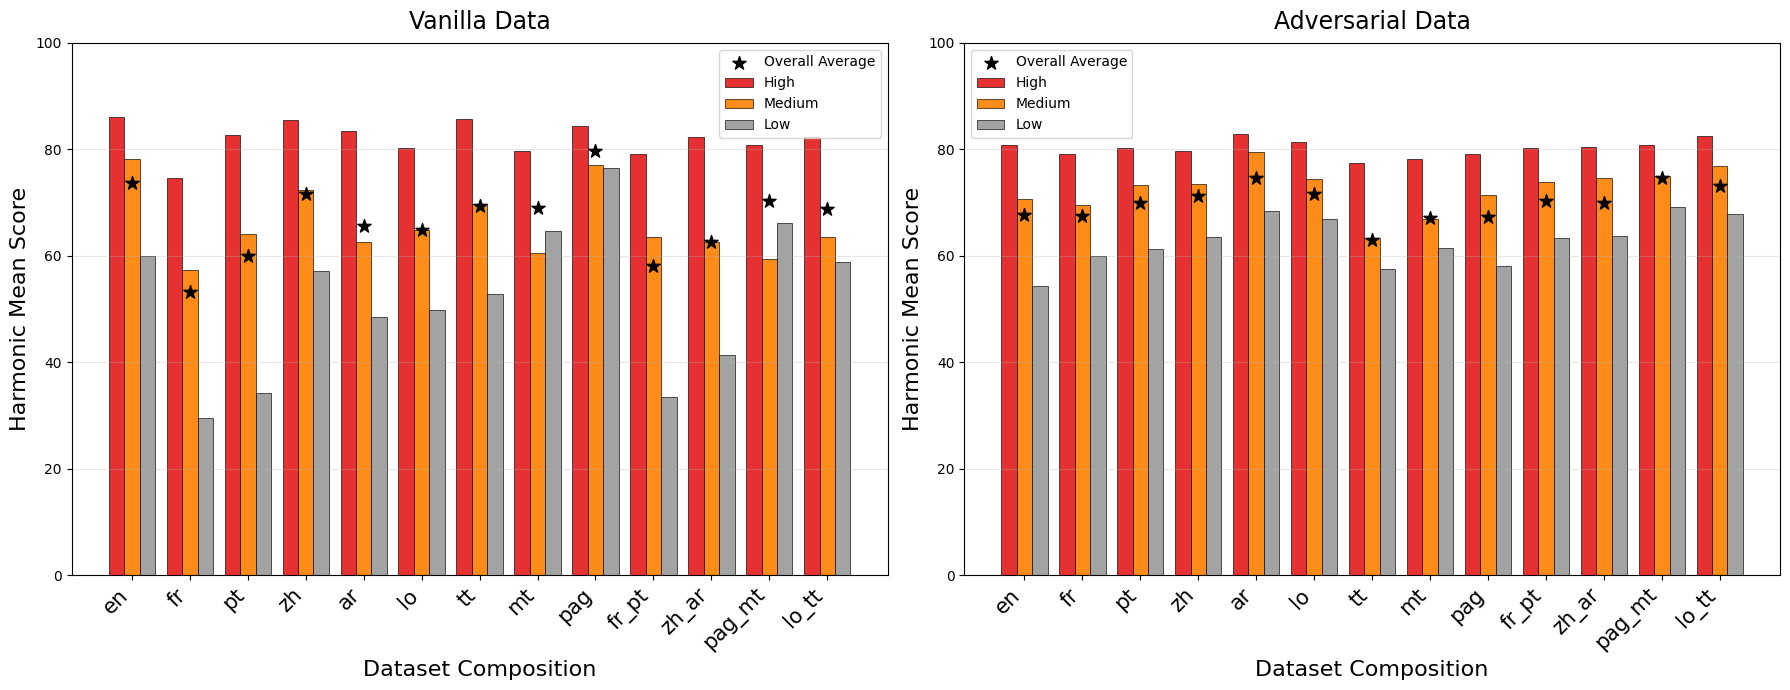

In [ ]:
create_harmonic_mean_barplot(df_ref_vanilla, df_over_vanilla, 
                                         df_ref_adversarial, df_over_adversarial, model_base, lg_list)


Common compositions (3): ['High', 'Medium', 'Low']
Using 3 compositions: ['High', 'Medium', 'Low']
Found 13 categories: ['en', 'fr', 'pt', 'zh', 'ar', 'lo', 'tt', 'mt', 'pag', 'fr_pt', 'zh_ar', 'pag_mt', 'lo_tt']


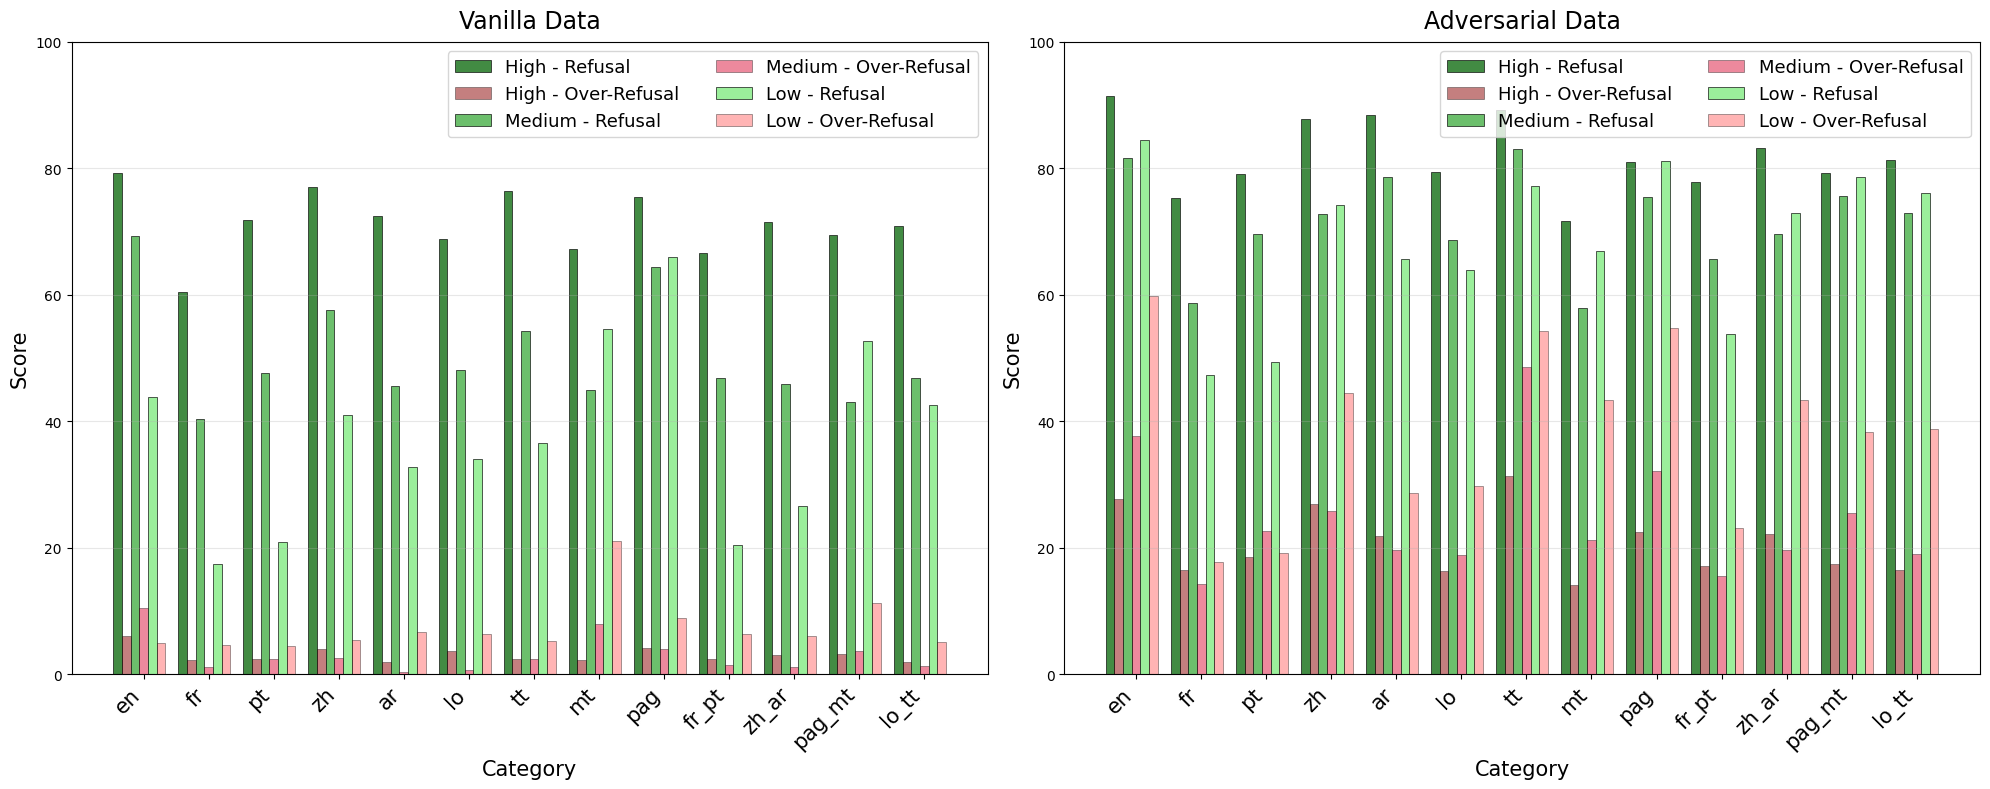

In [ ]:
create_refusal_barplot_cat(df_cat_ref_vanilla.transpose(), df_cat_over_vanilla.transpose(), 
                            df_cat_ref_adversarial.transpose(), df_cat_over_adversarial.transpose(), model_base, lg_list)


Common languages (3): ['High', 'Medium', 'Low']
Common compositions (9): ['en', 'fr', 'pt', 'zh', 'pag', 'fr_pt', 'pag_mt', 'lo_tt', 'zh_ar']


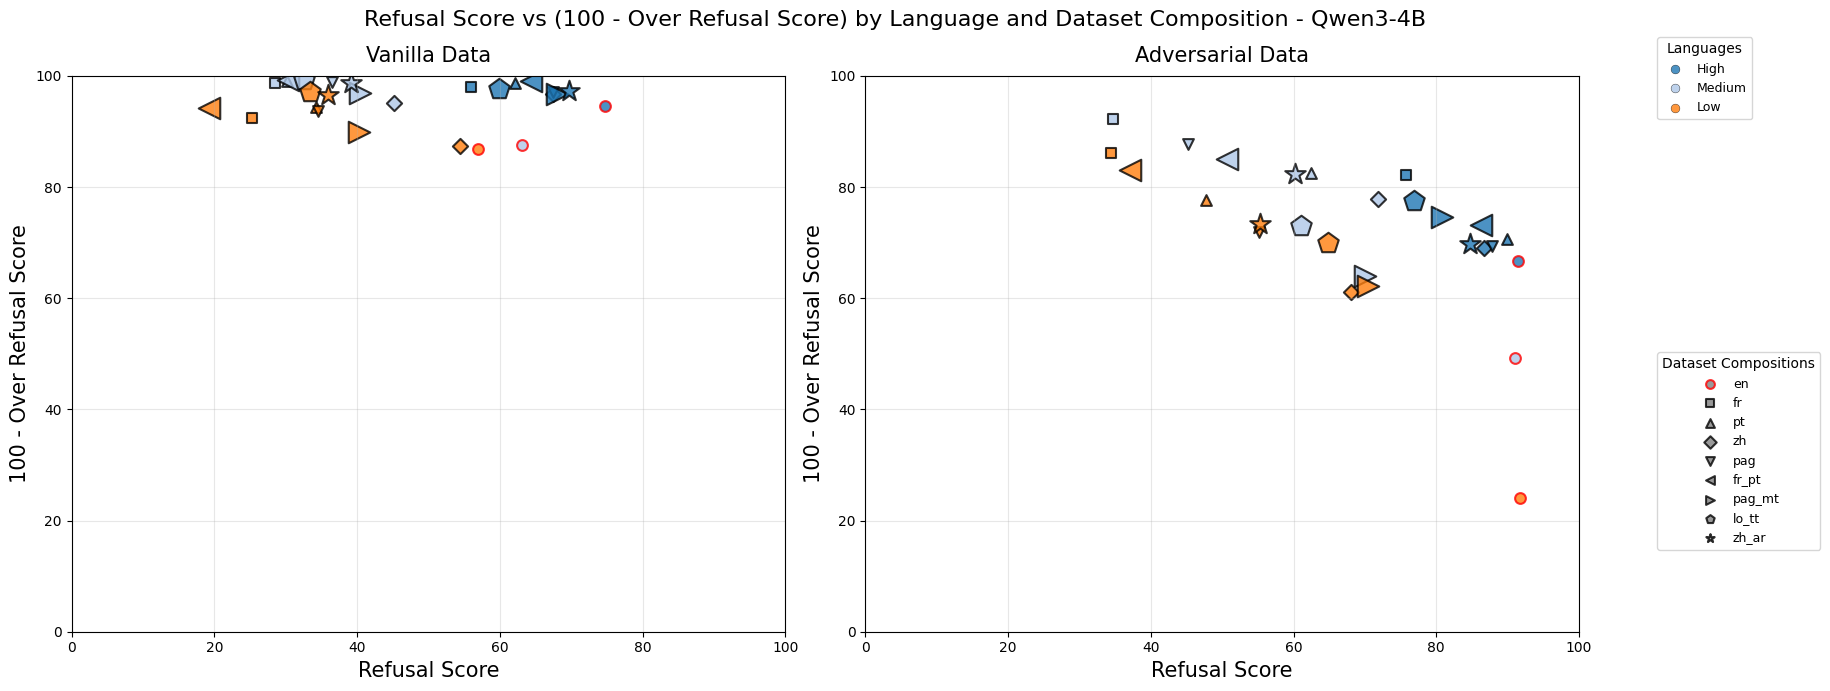

In [ ]:
lg_list = [ "en", "fr", "pt", "zh", "pag", "fr_pt",  "pag_mt", "lo_tt", "zh_ar"]
path = "../data_results/padding_left/Qwen3-4B"

model_base = "Qwen3-4B"

data_over_refusal = {}
data_refusal = {}

for lg in lg_list :
    epoch = 2.00
    if lg=="without_WJ": 
        model = "baseline_en"
        checkpoint=3800
    else:
        model = lg
        checkpoint=3988
    path_ref_json = f"{path}/{model}/result_refusal_vanilla_{checkpoint}_left_padding.json"
    path_ove_json = f"{path}/{model}/result_over_refusal_vanilla_{checkpoint}_left_padding.json"
    path_inc_json = f"{path}/{model}/result_incertain_harmful_vanilla_{checkpoint}_left_padding.json"
    with open(path_ref_json) as json_file:
        data_ref = json.load(json_file)
    with open(path_ove_json) as json_file:
        data_over = json.load(json_file)
    with open(path_inc_json) as json_file:
        data_inc = json.load(json_file)


    data_r = sum_dict(data_ref, data_inc)
    data_refusal[lg] = data_r
    data_over_refusal[lg] = data_over
    

lg_eval=list(data_refusal["en"].keys())

ref_all = []
over_all=[]
for lg_train in lg_list :
    satis_model = []
    ref_model = []
    over_model=[]
    for lg_ev in lg_eval : 
        ref = np.sum(list(data_refusal[lg_train][lg_ev].values()))
        over = np.sum(list(data_over_refusal[lg_train][lg_ev].values()))
        ref_model.append(ref)
        over_model.append(over)
    ref_all.append(pd.Series(ref_model, index=lg_eval))
    over_all.append(pd.Series(over_model, index=lg_eval))

df_ref_vanilla = pd.concat(ref_all, axis=1, keys=lg_list)
df_over_vanilla = pd.concat(over_all, axis=1, keys=lg_list)

data_over_refusal = {}
data_refusal = {}

for lg in lg_list :
    epoch = 2.00
    if lg=="without_WJ": 
        model = "baseline_en"
        checkpoint=3800
    else:
        model = lg
        checkpoint=3988
    path_ref_json = f"{path}/{model}/result_refusal_adversarial_{checkpoint}_left_padding.json"
    path_ove_json = f"{path}/{model}/result_over_refusal_adversarial_{checkpoint}_left_padding.json"
    path_inc_json = f"{path}/{model}/result_incertain_harmful_adversarial_{checkpoint}_left_padding.json"
    with open(path_ref_json) as json_file:
        data_ref = json.load(json_file)
    with open(path_ove_json) as json_file:
        data_over = json.load(json_file)
    with open(path_inc_json) as json_file:
        data_inc = json.load(json_file)


    data_r = sum_dict(data_ref, data_inc)
    data_refusal[lg] = data_r
    data_over_refusal[lg] = data_over
    

lg_eval=list(data_refusal["en"].keys())

ref_all = []
over_all=[]
for lg_train in lg_list :
    satis_model = []
    ref_model = []
    over_model=[]
    for lg_ev in lg_eval : 
        ref = np.sum(list(data_refusal[lg_train][lg_ev].values()))
        over = np.sum(list(data_over_refusal[lg_train][lg_ev].values()))
        ref_model.append(ref)
        over_model.append(over)
    ref_all.append(pd.Series(ref_model, index=lg_eval))
    over_all.append(pd.Series(over_model, index=lg_eval))

df_ref_adversarial = pd.concat(ref_all, axis=1, keys=lg_list)
df_over_adversarial = pd.concat(over_all, axis=1, keys=lg_list)

high_lg = ['en','fr','pt', 'de', 'es','ja', 'ar', 'zh']
middle_lg = ['bn', 'el', 'da']
low_lg = ['jv', 'sw', 'mk' , 'lo', 'tt', 'pag', 'mt']


df_high=df_ref_vanilla[df_ref_vanilla.index.isin(high_lg)]
df_medium=df_ref_vanilla[df_ref_vanilla.index.isin(middle_lg)]
df_low=df_ref_vanilla[df_ref_vanilla.index.isin(low_lg)]
df_cat_ref_vanilla=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

df_high=df_ref_adversarial[df_ref_adversarial.index.isin(high_lg)]
df_medium=df_ref_adversarial[df_ref_adversarial.index.isin(middle_lg)]
df_low=df_ref_adversarial[df_ref_adversarial.index.isin(low_lg)]
df_cat_ref_adversarial=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

df_high=df_over_vanilla[df_over_vanilla.index.isin(high_lg)]
df_medium=df_over_vanilla[df_over_vanilla.index.isin(middle_lg)]
df_low=df_over_vanilla[df_over_vanilla.index.isin(low_lg)]
df_cat_over_vanilla=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

df_high=df_over_adversarial[df_over_adversarial.index.isin(high_lg)]
df_medium=df_over_adversarial[df_over_adversarial.index.isin(middle_lg)]
df_low=df_over_adversarial[df_over_adversarial.index.isin(low_lg)]
df_cat_over_adversarial=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

create_combined_refusal_scatter_subplots(df_cat_ref_vanilla.transpose(), df_cat_over_vanilla.transpose(), 
                                         df_cat_ref_adversarial.transpose(), df_cat_over_adversarial.transpose(), model_base)


Common compositions (9): ['en', 'fr', 'pt', 'zh', 'pag', 'fr_pt', 'pag_mt', 'lo_tt', 'zh_ar']
Using 9 compositions in lg_list order: ['en', 'fr', 'pt', 'zh', 'pag', 'fr_pt', 'pag_mt', 'lo_tt', 'zh_ar']


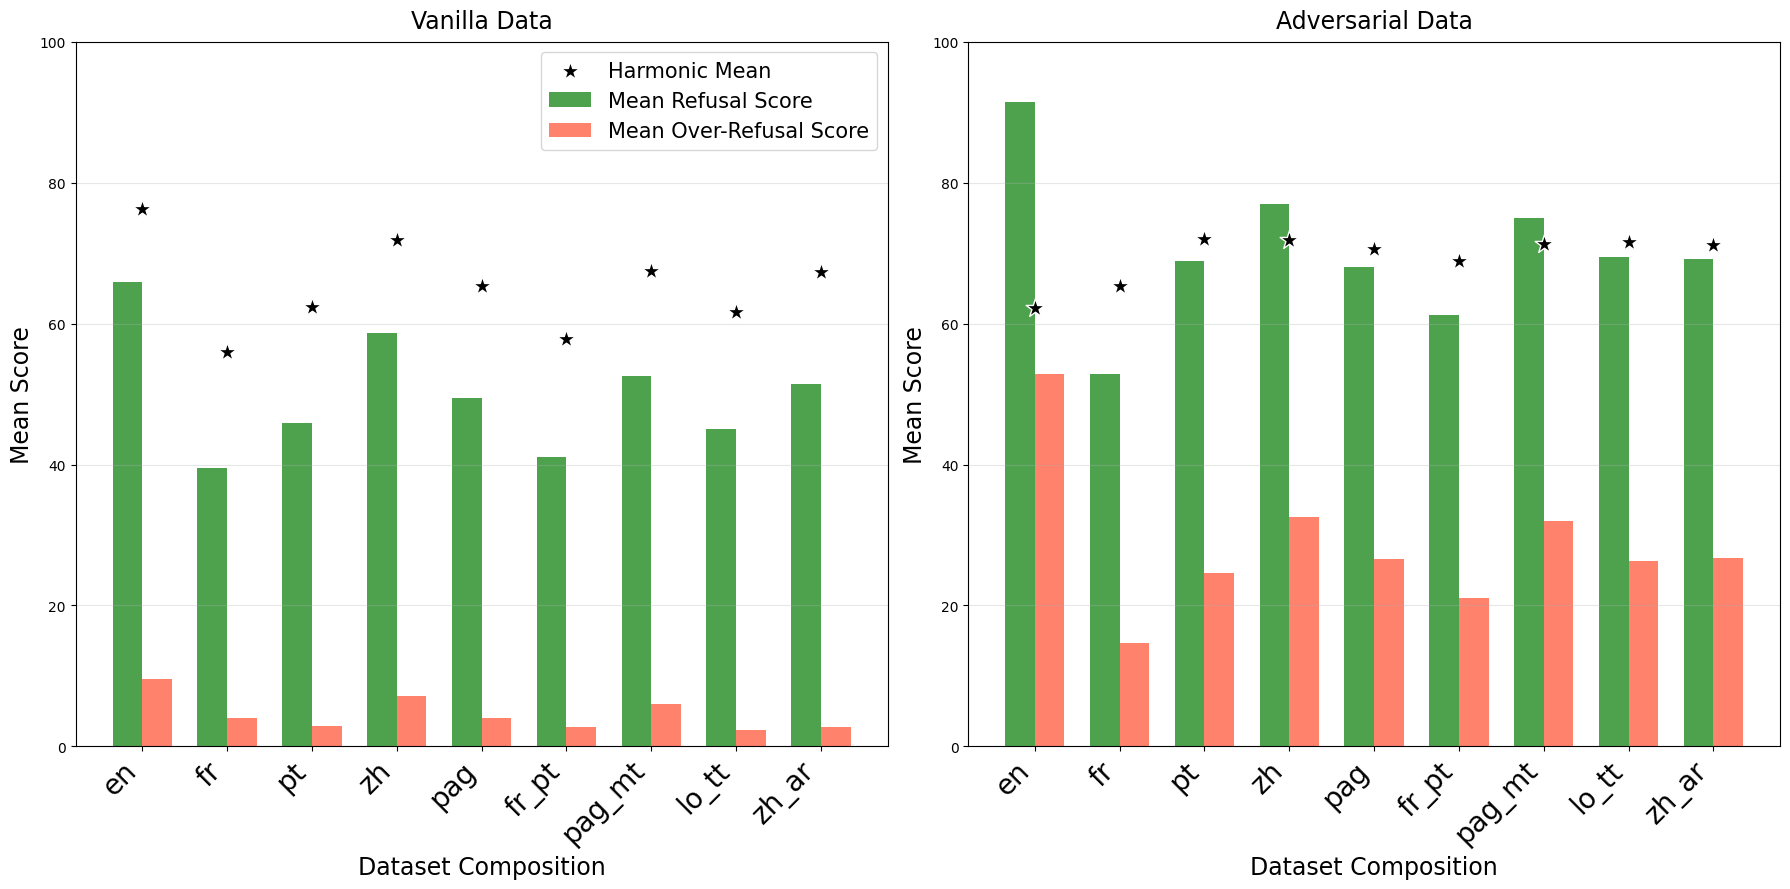

In [ ]:
create_refusal_barplot(df_ref_vanilla, df_over_vanilla, 
                           df_ref_adversarial, df_over_adversarial, model_base, lg_list)


Harmonic mean vanilla by category:
               en         fr         pt         zh        pag      fr_pt  \
High    83.505167  71.236753  76.247733  79.492386  79.522537  78.048534   
Medium  73.400893  44.229145  46.250657  61.263139  53.319655  46.466610   
Low     68.768130  39.711320  50.220092  67.076178  50.500477  31.918490   

           pag_mt      lo_tt      zh_ar  
High    79.881118  74.257914  81.232072  
Medium  56.950144  48.966971  56.080143  
Low     55.559372  49.661428  52.374764  

Harmonic mean adversarial by category:
               en         fr         pt         zh        pag      fr_pt  \
High    77.105929  78.871390  79.119794  76.877759  77.536765  79.173363   
Medium  63.980998  50.407699  71.120690  74.713066  59.617733  63.488943   
Low     38.140303  49.183673  59.126586  64.389381  62.400129  51.251636   

           pag_mt      lo_tt      zh_ar  
High    77.600523  77.123734  76.496358  
Medium  66.865672  66.462687  69.525926  
Low     66.138784  6

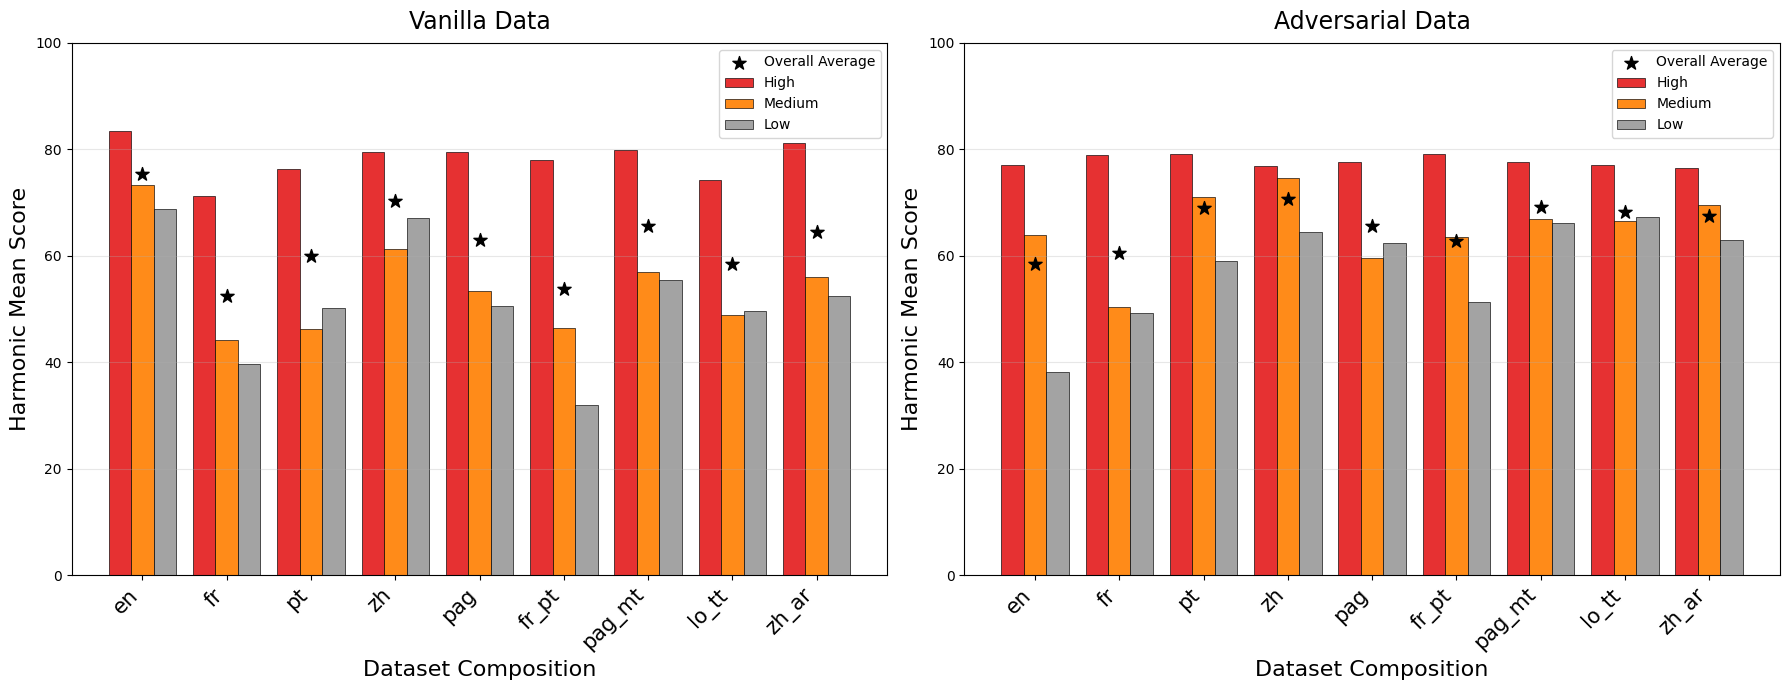

In [ ]:
create_harmonic_mean_barplot(df_ref_vanilla, df_over_vanilla, 
                                         df_ref_adversarial, df_over_adversarial, model_base, lg_list)


Common compositions (3): ['High', 'Medium', 'Low']
Using 3 compositions: ['High', 'Medium', 'Low']
Found 9 categories: ['en', 'fr', 'pt', 'zh', 'pag', 'fr_pt', 'pag_mt', 'lo_tt', 'zh_ar']


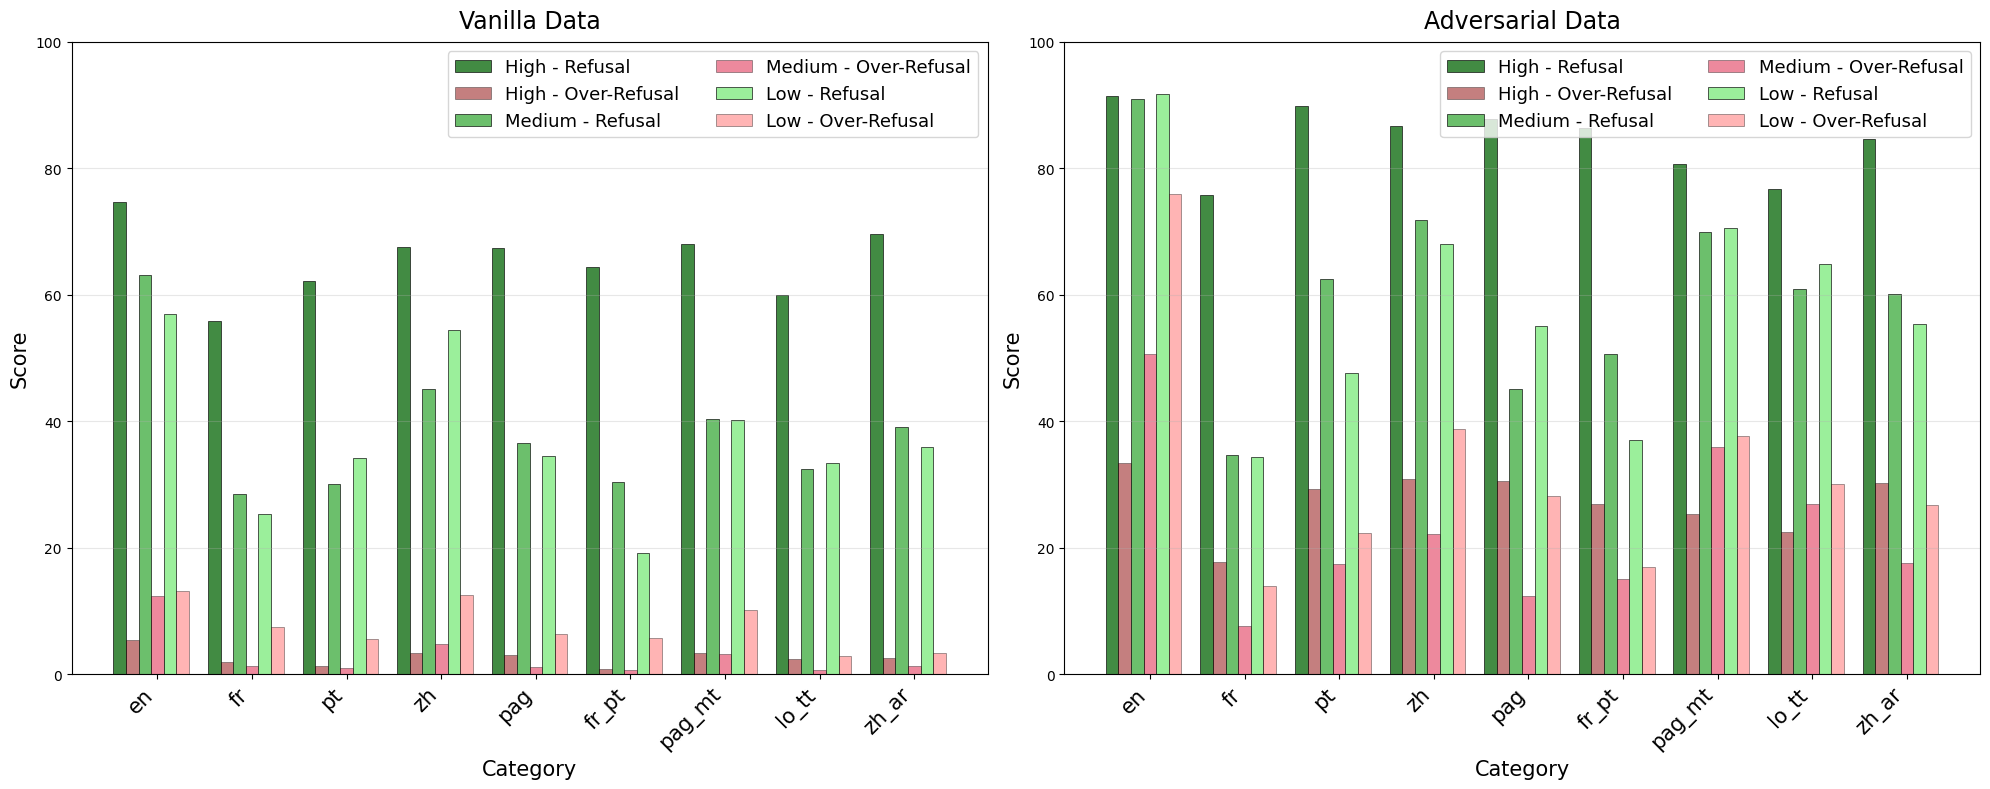

In [ ]:
create_refusal_barplot_cat(df_cat_ref_vanilla.transpose(), df_cat_over_vanilla.transpose(), 
                            df_cat_ref_adversarial.transpose(), df_cat_over_adversarial.transpose(), model_base, lg_list)


Common languages (3): ['High', 'Medium', 'Low']
Common compositions (5): ['en', 'fr', 'pag', 'fr_pt', 'pag_mt']


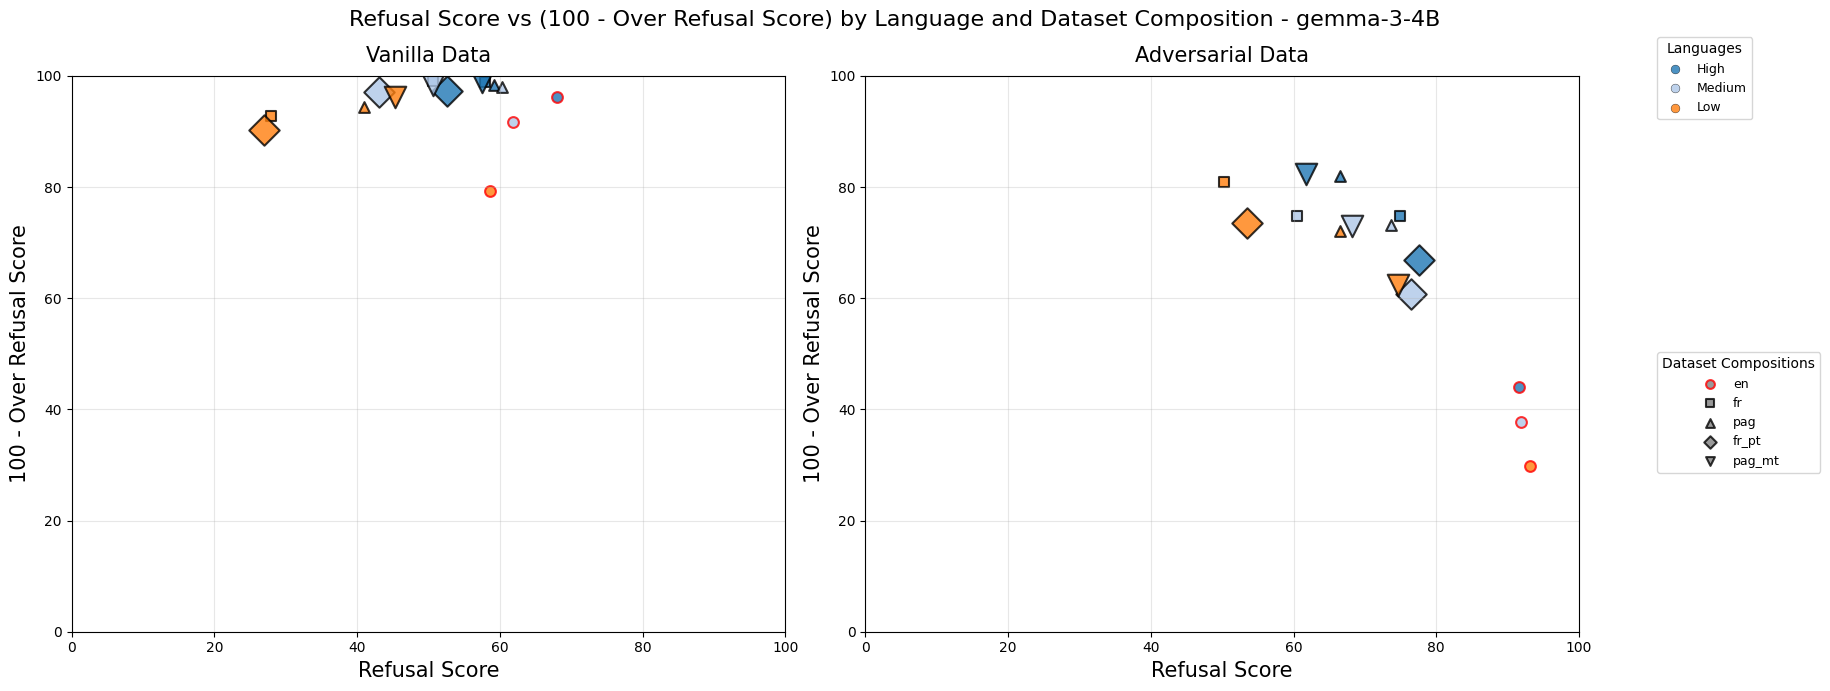

In [ ]:
lg_list = [ "en", "fr", "pag", "fr_pt",  "pag_mt"]
path = "../data_results/results_with_translation/gemma-3-4B"

model_base = "gemma-3-4B"

data_over_refusal = {}
data_refusal = {}

for lg in lg_list :
    epoch = 2.00
    if lg=="without_WJ": 
        model = "baseline_en"
        checkpoint=3800
    else:
        model = lg
        checkpoint=3988
    path_ref_json = f"{path}/{model}/result_refusal_vanilla_{checkpoint}.json"
    path_ove_json = f"{path}/{model}/result_over_refusal_vanilla_{checkpoint}.json"
    path_inc_json = f"{path}/{model}/result_incertain_harmful_vanilla_{checkpoint}.json"
    with open(path_ref_json) as json_file:
        data_ref = json.load(json_file)
    with open(path_ove_json) as json_file:
        data_over = json.load(json_file)
    with open(path_inc_json) as json_file:
        data_inc = json.load(json_file)


    data_r = sum_dict(data_ref, data_inc)
    data_refusal[lg] = data_r
    data_over_refusal[lg] = data_over
    

lg_eval=list(data_refusal["en"].keys())

ref_all = []
over_all=[]
for lg_train in lg_list :
    satis_model = []
    ref_model = []
    over_model=[]
    for lg_ev in lg_eval : 
        ref = np.sum(list(data_refusal[lg_train][lg_ev].values()))
        over = np.sum(list(data_over_refusal[lg_train][lg_ev].values()))
        ref_model.append(ref)
        over_model.append(over)
    ref_all.append(pd.Series(ref_model, index=lg_eval))
    over_all.append(pd.Series(over_model, index=lg_eval))

df_ref_vanilla = pd.concat(ref_all, axis=1, keys=lg_list)
df_over_vanilla = pd.concat(over_all, axis=1, keys=lg_list)

data_over_refusal = {}
data_refusal = {}

for lg in lg_list :
    epoch = 2.00
    if lg=="without_WJ": 
        model = "baseline_en"
        checkpoint=3800
    else:
        model = lg
        checkpoint=3988
    path_ref_json = f"{path}/{model}/result_refusal_adversarial_{checkpoint}.json"
    path_ove_json = f"{path}/{model}/result_over_refusal_adversarial_{checkpoint}.json"
    path_inc_json = f"{path}/{model}/result_incertain_harmful_adversarial_{checkpoint}.json"
    with open(path_ref_json) as json_file:
        data_ref = json.load(json_file)
    with open(path_ove_json) as json_file:
        data_over = json.load(json_file)
    with open(path_inc_json) as json_file:
        data_inc = json.load(json_file)


    data_r = sum_dict(data_ref, data_inc)
    data_refusal[lg] = data_r
    data_over_refusal[lg] = data_over
    

lg_eval=list(data_refusal["en"].keys())

ref_all = []
over_all=[]
for lg_train in lg_list :
    satis_model = []
    ref_model = []
    over_model=[]
    for lg_ev in lg_eval : 
        ref = np.sum(list(data_refusal[lg_train][lg_ev].values()))
        over = np.sum(list(data_over_refusal[lg_train][lg_ev].values()))
        ref_model.append(ref)
        over_model.append(over)
    ref_all.append(pd.Series(ref_model, index=lg_eval))
    over_all.append(pd.Series(over_model, index=lg_eval))

df_ref_adversarial = pd.concat(ref_all, axis=1, keys=lg_list)
df_over_adversarial = pd.concat(over_all, axis=1, keys=lg_list)

high_lg = ['en','fr','pt', 'de', 'es','ja', 'ar', 'zh']
middle_lg = ['bn', 'el', 'da']
low_lg = ['jv', 'sw', 'mk' , 'lo', 'tt', 'pag', 'mt']


df_high=df_ref_vanilla[df_ref_vanilla.index.isin(high_lg)]
df_medium=df_ref_vanilla[df_ref_vanilla.index.isin(middle_lg)]
df_low=df_ref_vanilla[df_ref_vanilla.index.isin(low_lg)]
df_cat_ref_vanilla=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

df_high=df_ref_adversarial[df_ref_adversarial.index.isin(high_lg)]
df_medium=df_ref_adversarial[df_ref_adversarial.index.isin(middle_lg)]
df_low=df_ref_adversarial[df_ref_adversarial.index.isin(low_lg)]
df_cat_ref_adversarial=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

df_high=df_over_vanilla[df_over_vanilla.index.isin(high_lg)]
df_medium=df_over_vanilla[df_over_vanilla.index.isin(middle_lg)]
df_low=df_over_vanilla[df_over_vanilla.index.isin(low_lg)]
df_cat_over_vanilla=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

df_high=df_over_adversarial[df_over_adversarial.index.isin(high_lg)]
df_medium=df_over_adversarial[df_over_adversarial.index.isin(middle_lg)]
df_low=df_over_adversarial[df_over_adversarial.index.isin(low_lg)]
df_cat_over_adversarial=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

create_combined_refusal_scatter_subplots(df_cat_ref_vanilla.transpose(), df_cat_over_vanilla.transpose(), 
                                         df_cat_ref_adversarial.transpose(), df_cat_over_adversarial.transpose(), model_base)


Common compositions (5): ['en', 'fr', 'pag', 'fr_pt', 'pag_mt']
Using 5 compositions in lg_list order: ['en', 'fr', 'pag', 'fr_pt', 'pag_mt']


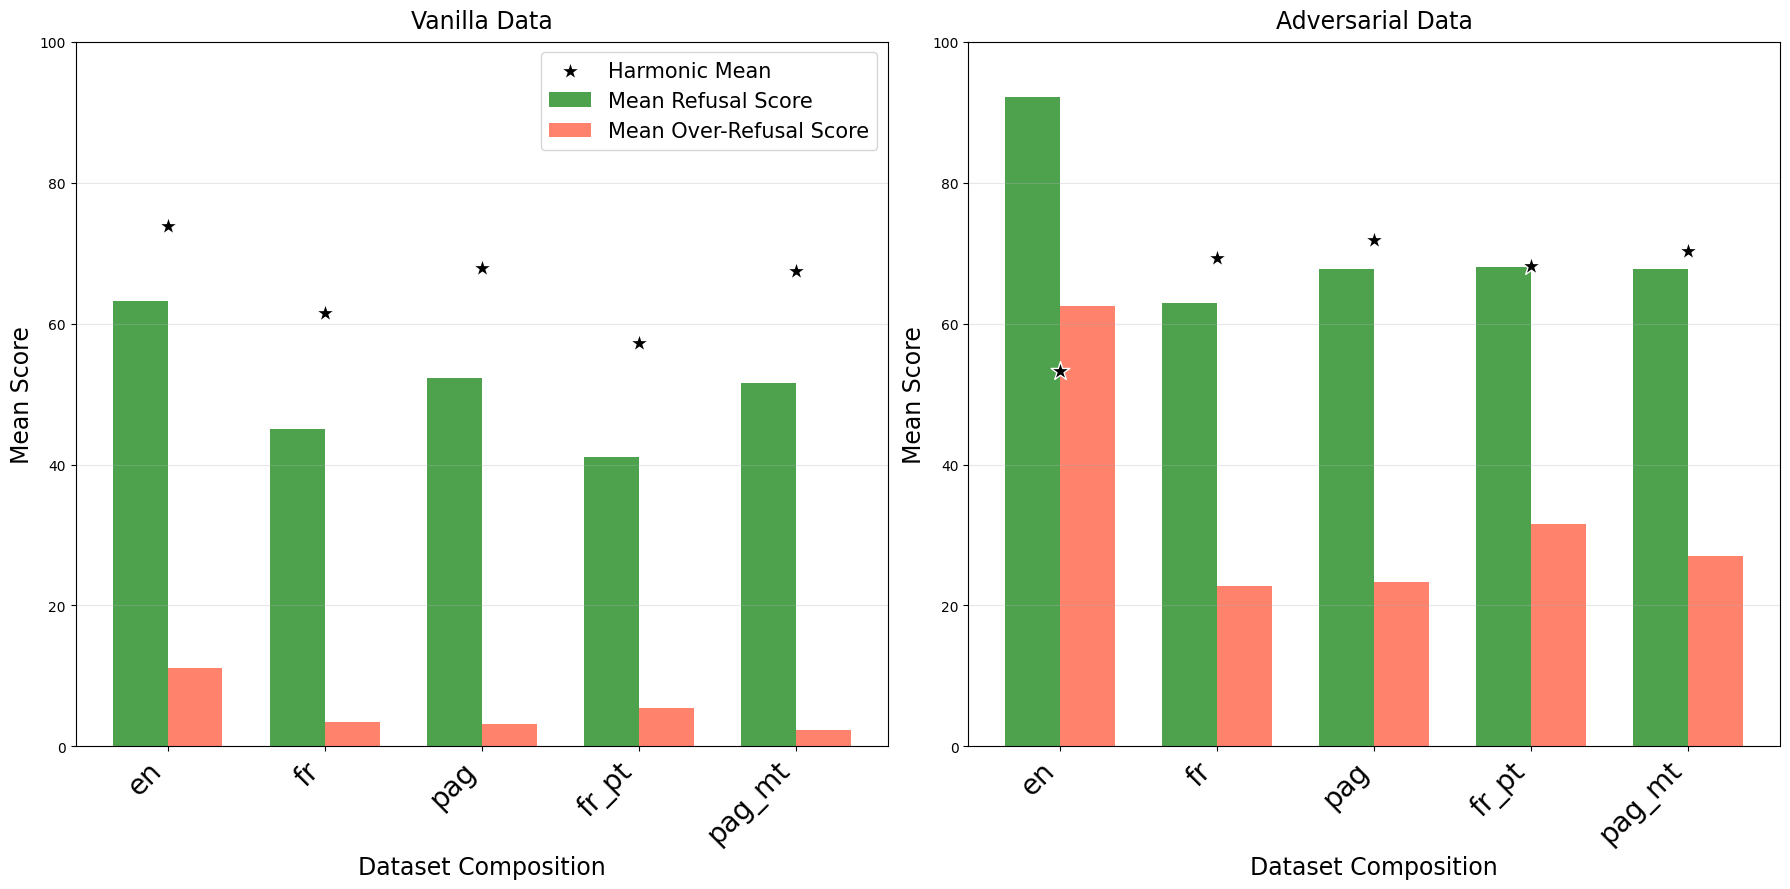

In [ ]:
create_refusal_barplot(df_ref_vanilla, df_over_vanilla, 
                           df_ref_adversarial, df_over_adversarial, model_base, lg_list)


Harmonic mean vanilla by category:
               en         fr        pag      fr_pt     pag_mt
High    79.628856  73.085414  73.867153  68.251599  72.648827
Medium  73.850887  67.045923  74.675558  59.592700  66.875466
Low     67.372317  43.017479  57.178015  41.563769  61.596290

Harmonic mean adversarial by category:
               en         fr        pag      fr_pt     pag_mt
High    59.494528  74.906237  73.454072  71.787284  70.522949
Medium  53.421707  66.907635  73.415815  67.773058  70.500590
Low     45.128821  62.029085  69.245255  61.925197  67.991513

Overall harmonic mean vanilla (across all 18 languages):
en        73.456781
fr        59.989854
pag       67.080986
fr_pt     55.988235
pag_mt    66.939717
dtype: float64

Overall harmonic mean adversarial (across all 18 languages):
en        52.530360
fr        67.089901
pag       71.006867
fr_pt     65.156696
pag_mt    68.563867
dtype: float64

Found 5 categories: ['en', 'fr', 'pag', 'fr_pt', 'pag_mt']


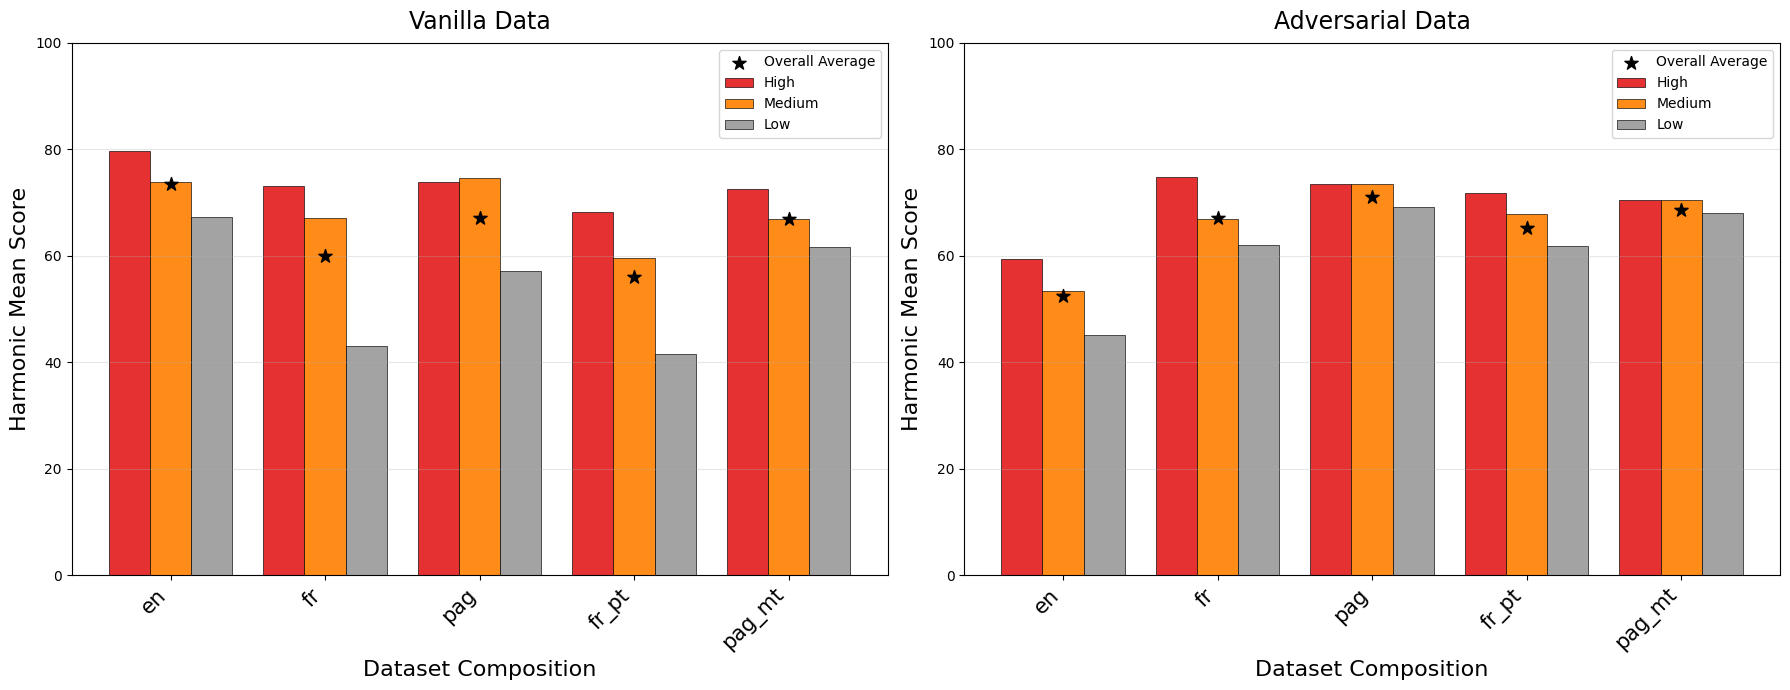

In [ ]:
create_harmonic_mean_barplot(df_ref_vanilla, df_over_vanilla, 
                                         df_ref_adversarial, df_over_adversarial, model_base, lg_list)


Common compositions (3): ['High', 'Medium', 'Low']
Using 3 compositions: ['High', 'Medium', 'Low']
Found 5 categories: ['en', 'fr', 'pag', 'fr_pt', 'pag_mt']


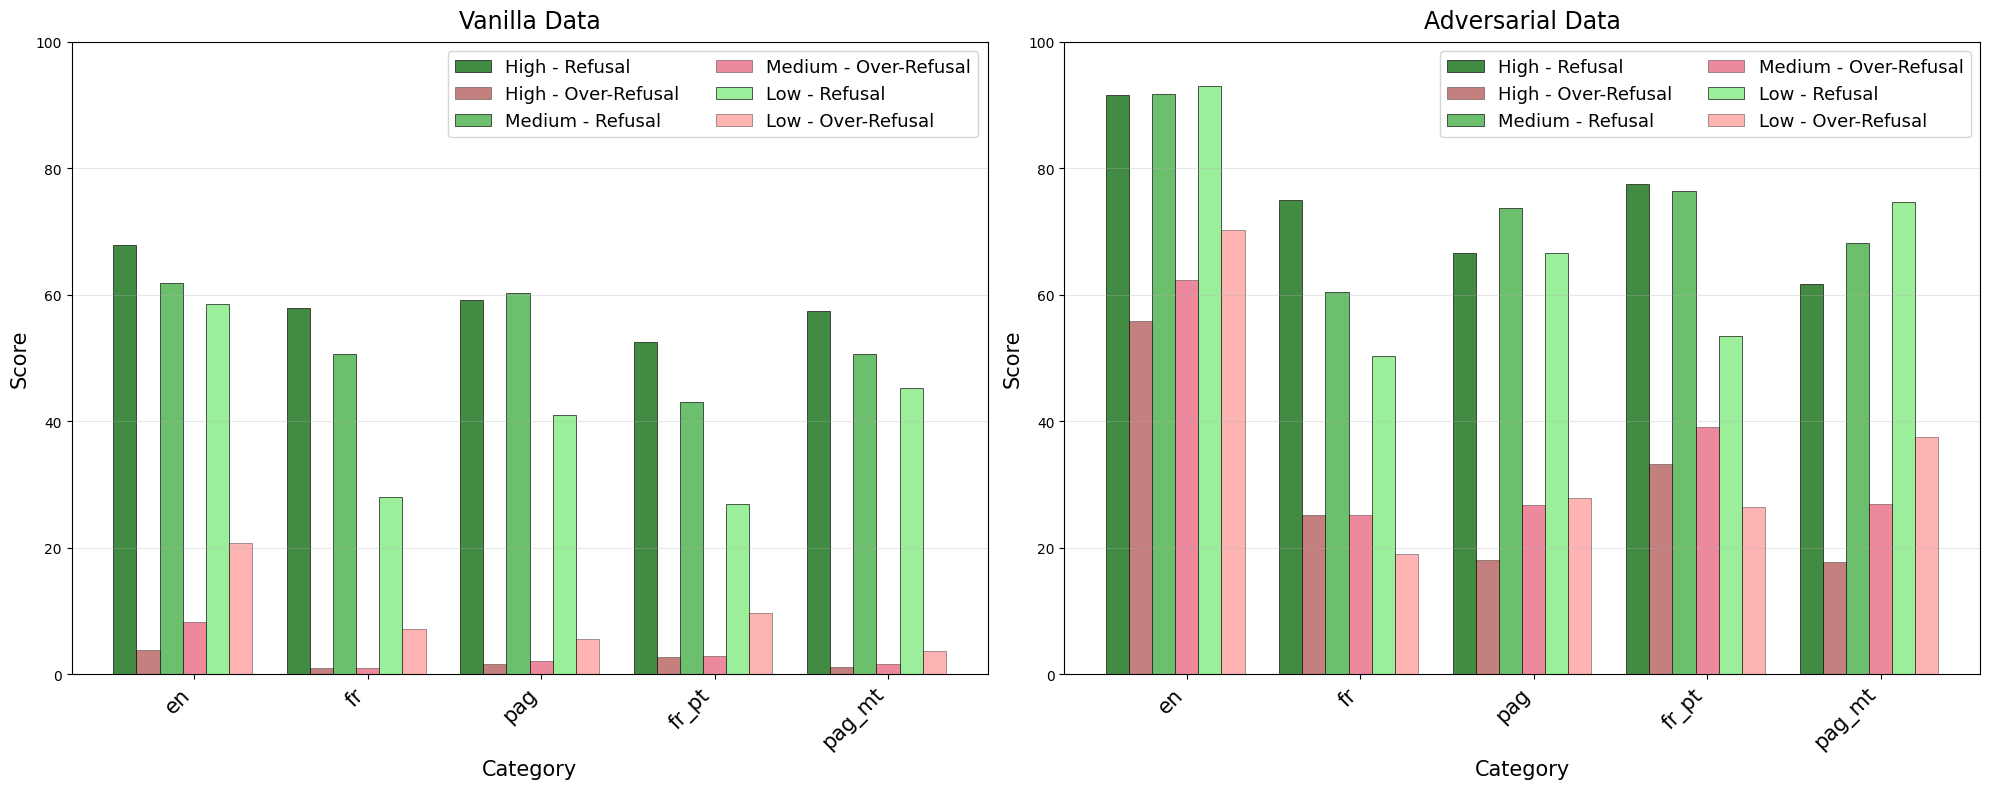

In [ ]:
create_refusal_barplot_cat(df_cat_ref_vanilla.transpose(), df_cat_over_vanilla.transpose(), 
                            df_cat_ref_adversarial.transpose(), df_cat_over_adversarial.transpose(), model_base, lg_list)